# <font color='#0091D0' size = 2><h1 align = "center">Machine Learning in Business World</h1><font>
   
_<font size = 1><center>Date: April 1 2019</center><font>_
_<font size = 1><center>Author: Zhihao Fang</center><font>_
    
<img src="https://i.postimg.cc/mZMnK3ST/1.png" width = "500">

## <font color='#0091D0'>Foreword</font>
This document is the simple introduction of machine learning. The contents are based on my understanding and other sources I was referring to, such as open course and open notes. All the external source are listed in the reference section.

The goals of each learner vary, for me, I am not planing to focus on the mathematical formula or the implementation of each algorithm for 2 reasons.
1. There is no necessary to program each algorithm as open sources are available, the focus should be how to construct the solution to solve the real business problem, how to leverage AI technology to solve client's requirements, what is the best model, what kind of process should be designed. 
2. AI tech is developing rapidly, we do not have time to understand each emerging algorithm from each angle, formula, programming, optimization,etc. In real world, a successful solution does not only depend on the model as it composes of multiple components. It must be worthwhile to think about what kind of person we want to be in term of AI, programmer? Designer? Analytics? AI sales?

<font color='#efa443'>So let's start the journey and cooperate together to demystify the AI. </font>

## <font color='#0091D0'>1	Linear and Logistic Regression</font>
This section introduces regression algorithm in machine learning field. 

### <font color='#0091D0'>1.1	Linear Regression</font>
This section describes the algorithm of linear regression, including two approaches to calculate regression coefficients: Gradient Descending and Least Square.
__[Reference](http://cs229.stanford.edu/notes/cs229-notes1.pdf)__

#### <font color = '#0091D0'>1.1.1	Gradient Descending</font>
\begin{equation}
h(\theta)=\theta^{T} X=\sum \theta_{i} * X_{i}
\end{equation}
    
$$
\begin{aligned} \frac{\partial}{\partial \theta_{j}} J(\theta) &=\frac{\partial}{\partial \theta_{j}} \frac{1}{2}\left(h_{\theta}(x)-y\right)^{2} \\ &=2 \cdot \frac{1}{2}\left(h_{\theta}(x)-y\right) \cdot \frac{\partial}{\partial \theta_{j}}\left(h_{\theta}(x)-y\right) \\ &=\left(h_{\theta}(x)-y\right) \cdot \frac{\partial}{\partial \theta_{j}}\left(\sum_{i=0}^{n} \theta_{i} x_{i}-y\right) \\ &=\left(h_{\theta}(x)-y\right) x_{j} \end{aligned}
$$

<img src="https://i.postimg.cc/kMYrdNVZ/2.png" width = "300">

Repeat until convergence{
$$
\theta_{j} :=\theta_{j}+\alpha \sum_{i=1}^{m}\left(y^{(i)}-h_{\theta}\left(x^{(i)}\right)\right) x_{j}^{(i)} \quad \text { (for every } j )
$$
}

#### <font color = '#0091D0'>1.1.2	Least Square Revisited</font>
    
The training example's input values in its rows:
$$
X=\left[ \begin{array}{c}{-\left(x^{(1)}\right)^{T}-} \\ {-\left(x^{(2)}\right)^{T}-} \\ {\vdots} \\ {-\left(x^{(m)}\right)^{T}-}\end{array}\right]
$$

Also, let y be the m-dimension vector containing all the target values from the training set

\begin{equation}
\vec{y}=\left[ \begin{array}{c}{y^{(1)}} \\ {y^{(2)}} \\ {\vdots} \\ {y^{(m)}}\end{array}\right]
\end{equation}

$$
\begin{aligned} \nabla_{\theta} J(\theta) &=\nabla_{\theta} \frac{1}{2}(X \theta-\vec{y})^{T}(X \theta-\vec{y}) \\ &=\frac{1}{2} \nabla_{\theta}\left(\theta^{T} X^{T} X \theta-\theta^{T} X^{T} \vec{y}-\vec{y}^{T} X \theta+\vec{y}^{T} \vec{y}\right) \\ &=\frac{1}{2} \nabla_{\theta} \operatorname{tr}\left(\theta^{T} X^{T} X \theta-\theta^{T} X^{T} \vec{y}-\vec{y}^{T} X \theta+\vec{y}^{T} \vec{y}\right) \\ &=\frac{1}{2} \nabla_{\theta}\left(\operatorname{tr} \theta^{T} X^{T} X \theta-2 \operatorname{tr} \vec{y}^{T} X \theta\right) \\ &=\frac{1}{2}\left(X^{T} X \theta+X^{T} X \theta-2 X^{T} \vec{y}\right) \\ &=X^{T} X \theta-X^{T} \vec{y} \end{aligned}
$$

\begin{equation}
\theta=\left(X^{T} X\right)^{-1} X^{T} \vec{y}
\end{equation}

#### <font color = '#0091D0'>1.1.3	Probability Interpretation </font>
    
Please refer to the Section 3 in the reference. In short, LS is equivalent to Gaussian distribution.

In [1]:
'''
This is an example of linear regression, the model can be assessed by R square, mean squared error
'''

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

# plt.xticks(())
# plt.yticks(())

plt.show()


Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


<Figure size 640x480 with 1 Axes>

### <font color='#0091D0'>1.2	Logistic Regression</font>

This section introduces the Logistic Regression. LR is widely used in binary regression (0,1 classification).

#### <font color = '#0091D0'>1.2.1	Sigmoid Function </font>

Linear algorithm performs poorly if y is discrete-valued, especially when y ∈ (0,1). To fix this, let's change the form for our hypotheses $h_{\theta}(x)$ We will choose 

$$
h_{\theta}(x)=g\left(\theta^{T} x\right)=\frac{1}{1+e^{-\theta^{T} x}}
$$

Where
\begin{equation}
g(z)=\frac{1}{1+e^{-z}}
\end{equation}

$g(z)$ is called sigmoid function. $g(z)$ indicated the probability of if y is 0 or 1. 
$$
y=1 \text { if } g(z)>0.5 \text { or } y=0
$$

In model training, the threshold can be changed as per business requirement, i.e., y can be classified 1 if $g(z)$ > 0.8, as we want to be more confident to accept the result.

<img src="https://i.postimg.cc/76xvqmnv/3.png" width = "300">

Let us assume that 
\begin{equation}
\begin{aligned} P(y=1 | x ; \theta) &=h_{\theta}(x) \\ P(y=0 | x ; \theta) &=1-h_{\theta}(x) \end{aligned}
\end{equation}

This can be written as 
$$
p(y | x ; \theta)=\left(h_{\theta}(x)\right)^{y}\left(1-h_{\theta}(x)\right)^{1-y}
$$

Assume that the m training examples were generated independently, we can then write down the likelihood of the parameters as:

\begin{equation}
\begin{aligned} L(\theta) &=p(\vec{y} | X ; \theta) \\ &=\prod_{i=1}^{m} p\left(y^{(i)} | x^{(i)} ; \theta\right) \\ &=\prod_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)\right)^{y^{(i)}}\left(1-h_{\theta}\left(x^{(i)}\right)\right)^{1-y^{(i)}} \end{aligned}
\end{equation}

$$
\begin{aligned} \ell(\theta) &=\log L(\theta) \\ &=\sum_{i=1}^{m} y^{(i)} \log h\left(x^{(i)}\right)+\left(1-y^{(i)}\right) \log \left(1-h\left(x^{(i)}\right)\right) \end{aligned}
$$

\begin{equation}
\begin{aligned} \frac{\partial}{\partial \theta_{j}} \ell(\theta) &=\left(y \frac{1}{g\left(\theta^{T} x\right)}-(1-y) \frac{1}{1-g\left(\theta^{T} x\right)}\right) \frac{\partial}{\partial \theta_{j}} g\left(\theta^{T} x\right) \\ &=\left(y \frac{1}{g\left(\theta^{T} x\right)}-(1-y) \frac{1}{1-g\left(\theta^{T} x\right)}\right) g\left(\theta^{T} x\right)\left(1-g\left(\theta^{T} x\right)\right) \frac{\partial}{\partial \theta_{j}} \theta^{T} x \\ &=\left(y\left(1-g\left(\theta^{T} x\right)\right)-(1-y) g\left(\theta^{T} x\right)\right) x_{j} \\ &=\left(y-h_{\theta}(x)\right) x_{j} \end{aligned}
\end{equation}

$$
\theta_{j} :=\theta_{j}+\alpha\left(y^{(i)}-h_{\theta}\left(x^{(i)}\right)\right) x_{j}^{(i)}
$$


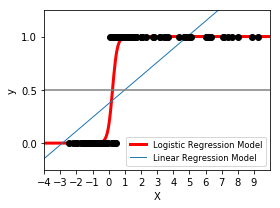

In [2]:
'''
This is an example of logistic regression,
The difference between linear regression and logistic regression is reflected in the fitting graph
'''
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model

# General a toy dataset:s it's just a straight line with some Gaussian noise:
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]

# Fit the classifier
clf = linear_model.LogisticRegression(C=1e5, solver='lbfgs')
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)


def model(x):
    return 1 / (1 + np.exp(-x))


loss = model(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)




ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='small')
plt.tight_layout()
plt.show()


### <font color='#0091D0'>1.3	Optimization Algorithm</font>
This section covers the algorithm to optimize cost function.

#### <font color = '#0091D0'>1.3.1	Gradient Descending</font>

##### <font color='#0091D0'> 1.3.1.1	Introduction</font>

Gradient Descent is used while training a machine learning model. It is an optimization algorithm, based on a convex function, that tweaks it's parameters iteratively to minimize a given function to its local minimum. 

You start by defining the initial parameters values and from there on Gradient Descent iteratively adjusts the values, using calculus, so that they minimize the given cost-function. But to understand it's concept fully, you first need to know what a It simply measures the change in all weights with regard to the change in error.  

You can also think of a gradient as the slope of a function. The higher the gradient, the steeper the slope and the faster a model can learn. But if the slope is zero, the model stops learning. Said it more mathematically, a gradient is a partial derivative with respect to its inputs.   

Imagine a blindfolded man who wants to climb a hill, with the fewest steps possible. He just starts climbing the hill by taking really big steps in the steepest direction, which he can do, as long as he is not close to the top. As he comes further to the top, he will do smaller and smaller steps, since he doesn't want to overshoot it. This process can be described mathematically, using the gradient.  

Just take a look at the picture below. Imagine it illustrates our hill from a top-down view, where the red arrows show the steps of our climber. Think of a gradient in this context as a vector that contains the direction of the steepest step the blindfolded man can go and also how long this step should be.  

<img src="https://i.postimg.cc/281sjqh5/4.png" width = "300">

Gradient Descent can be thought of climbing down to the bottom of a valley, instead of climbing up a hill.  

This is because it is a minimization algorithm that minimizes a given function.  

The equation below describes what Gradient Descent does: The bis the next position, the a is the current position. The minus sign refers to the minimization part of gradient descent. The "gamma" in the middle is a waiting factor and the gradient term ($\Delta f(a)$) is simply the direction of the steepest descent.  

$$
\mathbf{b}=\mathbf{a}-\gamma \nabla \mathbf{f}(\mathrm{a})
$$

#### <font color='#0091D0'>1.3.2	Importance of the Learning Rate</font>

How big the steps are that Gradient Descent takes into the direction of the local minimum are determined by the so-called learning rate. It determines how fast or slow we will move towards the optimal weights.  

If the steps it takes are too big, it maybe will not reach the local minimum because it just bounces back and forth between the convex function of gradient descent like you can see on the left side of the image below. If you set the learning rate to a very small value, gradient descent will eventually reach the local minimum but it will maybe take too much time like you can see on the right side of the image.  

<img src="https://i.postimg.cc/zB3sL36p/5.png" width = "300">


#### <font color='#0091D0'>1.3.3	How to Know If It Works Properly</font>

A good way to make sure that Gradient Descent runs properly is by plotting the cost function as Gradient Descent runs. You put the number of iterations on the x-axes and the value of the cost-function at the y-axes. This enables you to see the value of your cost function after each iteration of gradient descent. This lets you easily spot how appropriate your learning rate is. You just try different values for it and plot them all together.

<img src="https://i.postimg.cc/hvz2nd6W/6.png" width = "500">

If gradient descent is working properly, the cost function should decrease after every iteration.


#### <font color='#0091D0'>1.3.4	Computation Complexity Analysis and Approaches</font>
    
##### <font color='#0091D0'>1.3.4.1	Batch Gradient Descent</font>
    
First, let us have a look on a simple example on

\begin{equation}
\theta_{j} :=\theta_{j}+\alpha\left(y^{(i)}-h_{\theta}\left(x^{(i)}\right)\right) x_{j}^{(i)}
\end{equation}

$$
Fitting function: y=\theta_{0}+\theta_{1} * X_{1}+\theta_{2} * X_{2}, \varepsilon=y-h(x)
$$

We have 4 samples: 

$$
X=\begin{array}{ccc}{1} & {2} & {7} \\ {1} & {3} & {6} \\ {1} & {4} & {5} \\ {1} & {4} & {5}\end{array}
$$

So

\begin{equation}
\left[ \begin{array}{l}{\theta_{0}^{\prime}} \\ {\theta_{1}^{\prime}} \\ {\theta_{2}^{\prime}}\end{array}\right]=\left[ \begin{array}{l}{\theta_{0}} \\ {\theta_{1}} \\ {\theta_{2}}\end{array}\right]-X^{T} * \left[ \begin{array}{c}{\varepsilon_{0}} \\ {\varepsilon_{1}} \\ {\varepsilon_{2}}\end{array}\right]
\end{equation}

If this function is iterated for 100 times, 4 samples need to be considered. What if we have 1 million sample, 10 million, 100 million ? 

Batch Gradient Descent has the disadvantage that the stable error gradient can sometimes result in a state of convergence that isn't the best the model can achieve. It also requires that the entire training dataset is in memory and available to the algorithm.

##### <font color='#0091D0'>1.3.4.2	Stochastic Gradient Descent</font>
    
Stochastic gradient descent (SGD) in contrary, does this for each training example within the dataset. This means that it updates the parameters for each training example, one by one.  

The thing is that the frequent updates are more computationally expensive as the approach of Batch Gradient Descent. The frequency of those updates can also result in noisy gradients, which may cause the error rate to jump around, instead of slowly decreasing.  

<mark>Time increasing, Space decreasing.<mark>
    
##### <font color='#0091D0'>1.3.4.3	Mini Batch Gradient Descent</font>

Mini-batch Gradient Descent is the go-to method since it's a combination of the concepts of SGD and Batch Gradient Descent. It simply splits the training dataset into small batches and performs an update for each of these batches. Therefore it creates a balance between the robustness of stochastic gradient descent and the efficiency of batch gradient descent.

Common mini-batch sizes range between 50 and 256, but like for any other machine learning techniques, there is no clear rule, because they can vary for different applications. Note that it is the go-to algorithm when you are training a neural network and it is the most common type of gradient descent within deep learning.

In [3]:
'''
Stochastic Gradient Descent (SGD) is a simple yet very efficient approach to discriminative learning of linear classifiers under convex loss functions such as (linear) Support Vector Machines and Logistic Regression. 
Even though SGD has been around in the machine learning community for a long time, 
it has received a considerable amount of attention just recently in the context of large-scale learning.

The advantages of Stochastic Gradient Descent are:

Efficiency.
Ease of implementation (lots of opportunities for code tuning).
The disadvantages of Stochastic Gradient Descent include:

SGD requires a number of hyperparameters such as the regularization parameter and the number of iterations.
SGD is sensitive to feature scaling.
'''
from sklearn.linear_model import SGDClassifier
X = [[0., 0.], [1., 1.]]
y = [0, 1]

clf = SGDClassifier(loss="log", max_iter=5).fit(X, y)
clf.predict_proba([[1., 1.]]) 


C:\Users\zhihao.fang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


array([[4.97248476e-07, 9.99999503e-01]])

In [4]:
'''
This is the demo regarding how to use batch method in Logistic regression

'''
# https://github.com/xiaotanzhuying/LR_sample/blob/master/LR_sklearn_pro.py


import pandas as pd
import numpy as np
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

classifier = SGDClassifier(loss = 'log') #


filenames = "***"
MaxIterNum = 100
count = 0
for c, filename in enumerate(filenames):
    TrainDF = pd.read_csv(filename, header = None, chunksize = 10)
    for Batch in TrainDF:
        count += 1
        print count
        
        y_train = np.array(Batch.iloc[:,0])
        X_train = np.array(Batch.iloc[:,1:])
        
        st1 = time.time()
        classifier.partial_fit(X_train,y_train, classes=np.array([0, 1, 2]))
        ed1 = time.time()
        st2 = time.time()
        predictions = classifier.predict(X_train)
        acc = accuracy_score(y_train,predictions)
        ed2 = time.time()
        print ed1-st1, ed2-st2, acc
        
        if count == MaxIterNum:
            break
    if count == MaxIterNum:
        break



SyntaxError: Missing parentheses in call to 'print'. Did you mean print(count)? (<ipython-input-4-f548b6451320>, line 25)



### <font color='#0091D0'>1.4	Overfitting and Underfitting (Bias and Variance trade-off)</font>

This section describes two typical issues in model training: underfitting and overfitting and the approaches to get them fixed. It can be analyzed from bias and variance perspective. 

Underfitting: high bias but low variance.  
Overfitting: high variance but low bias.  

#### <font color = '#0091D0'>1.4.1	Regression Examples</font>
    
Underfitting: Too few features. It is easy to understand it, we have learned fitting in math courses.  

Overfitting: Too large set of features or too few training examples. If we have too many features, the learned hypothesis may fit the training set very well (cost function is close to 0) but fail to generalize to new examples.  

<img src="https://i.postimg.cc/d0jXNGP5/7.png" width = "500">
<img src="https://i.postimg.cc/kgrpnT7j/8.png" width = "500">

#### <font color = '#0091D0'>1.4.2	Learning Curve</font>
    
Typical learning curve for high variance

<img src="https://i.postimg.cc/wjJnJSW8/9.png" width = "500">

Suggests larger training set will help.  
Typical learning curve for high bias

<img src="https://i.postimg.cc/d0Yp94X7/10.png" width = "500">

+ Even training error is unacceptably high.  
+ Small gap between training and test error.  
+ Suggest larger set of features.  

#### <font color = '#0091D0'>1.4.3	Regularization cost function </font>
    
This section covers regularizations handling overfitting. Regularization is a effective way to resolve overfitting.

##### <font color = '#0091D0'>1.4.3.1	Regularization</font>
    
Suppose we have a fitting function $f$ and cost function $L$

$$
\begin{array}{l}{L(x, y)=\sum_{i=1}^{n}\left(y_{i}-f\left(x_{i}\right)\right)^{2}} \\ {f\left(x_{i}\right)=h_{\theta} x=\theta_{0}+\theta_{1} x_{1}+\theta_{2} x_{2}^{2}+\theta_{3} x_{3}^{3}+\theta_{4} x_{4}^{4}}\end{array}
$$

As the degree of the input features increases the model becomes complex, say, there are 1000 features. Obviously, it's very easy to get overfitting if we do not do feature selection.  
When we penalize the weights $\theta_{3}$ and $\theta_{4}$ and make them too small, very close to zero. It makes those terms negligible and helps simplify the model.

<img src="https://i.postimg.cc/tC8LsXNN/11.png" width = "300">

Regularization works on assumption that smaller weights generate simpler model and thus helps avoid overfitting.  
But what if the input variables have an impact on the output?  
To ensure we take into account the input variables, we penalize all the weights by making them small. This also makes the model simpler and less prone to overfitting.  

\begin{equation}
\begin{array}{l}{L(x, y)=\sum_{i=1}^{n}\left(y_{i}-h_{\theta}\left(x_{i}\right)\right)^{2}} \\ {\text { where } h_{\theta} x_{i}=\theta_{0}+\theta_{1} x_{1}+\theta_{2} x_{2}^{2}+\theta_{3} x_{3}^{3}+\theta_{4} x_{4}^{4}} \\ {L(x, y) \equiv \sum_{i=1}^{n}\left(y_{i}-h_{\theta}\left(x_{i}\right)\right)^{2}+\lambda \sum_{i=1}^{n} \theta_{i}^{2}}\end{array}
\end{equation}

The first approach is $L1$ and the second is $L2$.

##### <font color = '#0091D0'>1.4.3.2	L1 Regularization</font>
    
$L1$ regularization is also referred as $L1$ norm or Lasso
$L1$ regularization does feature selection. It does this by assigning insignificant input features with zero weight and useful features with a non zero weight.

\begin{equation}
L(x, y) \equiv \sum_{i=1}^{n}\left(y_{i}-h_{\theta}\left(x_{i}\right)\right)^{2}+\lambda \sum_{i=1}^{n} \theta_{i}^{2}
\end{equation}

Lasso produces a model that is simple, interpretable and contains a subset of input features.

##### <font color = '#0091D0'>1.4.3.3	L2 regularization</font>

$L2$ is also known as Ridge Regularization.  
In $L2$ regularization, regularization term is the sum of square of all feature weights as shown above in the equation.  
$L2$ regularization forces the weights to be small but does not make them zero and does non sparse solution.  
$L2$ is not robust to outliers as square terms blows up the error differences of the outliers and the regularization term tries to fix it by penalizing the weights.  
Ridge regression performs better when all the input features influence the output and all with weights are of roughly equal size.   

##### <font color = '#0091D0'>1.4.3.4	Difference between $L1$ and $L2$ regularization</font>
    
<mark>$L1$ Regularization<mark> 
    
+ $L1$ penalizes sum of absolute value of weights    
+ $L1$ has a sparse solution  
+ $L1$ has multiple solutions  
+ $L1$ has built in feature selection  
+ $L1$ is robust to outliers  
+ $L1$ generates model that are simple and interpretable but cannot learn complex patterns  

<mark>$L2$ Regularization<mark>
    
+ $L2$ regularization penalizes sum of square weights  
+ $L2$ has a non sparse solution  
+ $L2$ has one solution  
+ $L2$ has no feature selection  
+ $L2$ is not robust to outliers  
+ $L2$ gives better prediction when output variable is a function of all input features  
+ $L2$ regularization is able to learn complex data patterns  

##### <font color = '#0091D0'>1.4.3.5	Intuitive explaination of why L1 leading to sparsity</font>
    
<img src="https://i.postimg.cc/rmhHMcpW/12.jpg" width = "400">

##### <font color = '#0091D0'>1.4.3.6	Bayesian statistics </font>
    
Let us look at $L1$ and $L2$ regularization from Probability angle.   
At the beginning of the quarter, we talked about parameter fitting using maximum likelihood (ML), and chose our parameters according to

$$
\theta_{\mathrm{ML}}=\arg \max _{\theta} \prod_{i=1}^{m} p\left(y^{(i)} | x^{(i)} ; \theta\right)
$$

Throughout our subsequent discussions, we viewed $θ$ as an unknown parameter of the world. This view of the $θ$ as being constant-valued but unknown is taken in frequentist statistics.  

An alternative way to approach our parameter estimation problems is to take the Bayesian view of the world, and think of $θ$ as being a random variable whose value is unknown. In this approach, we would specify a prior distribution $p(θ)$ on $θ$ that expresses our “prior beliefs” about the parameters. Given a training set $\left\{X^{i}, Y^{i}\right\}_{i}^{m}$ when we are asked to make a prediction on a new value of $x$, we can then compute the posterior distribution on the parameters.  

$$
\begin{aligned} p(\theta | S) &=\frac{p(S | \theta) p(\theta)}{p(S)} \\ &=\frac{\left(\prod_{i=1}^{m} p\left(y^{(i)} | x^{(i)}, \theta\right)\right) p(\theta)}{\int_{\theta}\left(\prod_{i=1}^{m} p\left(y^{(i)} | x^{(i)}, \theta\right) p(\theta)\right) d \theta} \end{aligned}
$$

When we are given a new test example x and asked to make it prediction on it, we can compute our posterior distribution on the class label using the posterior distribution on $θ$:

\begin{equation}
p(y | x, S)=\int_{\theta} p(y | x, \theta) p(\theta | S) d \theta
\end{equation}

Thus, for example, if the goal is to the predict the expected value of y given x, then we would output

$$
\mathrm{E}[y | x, S]=\int_{y} y p(y | x, S) d y
$$

The procedure that we've outlined here can be thought of as doing "fully Bayesian" prediction, where our prediction is computed by taking an average with respect to the posterior $p(θ|S)$ over $θ$. Unfortunately, in  general it is computationally very difficult to compute this posterior distribution. This is because it requires taking integrals over the (usually high-dimensional) $θ$, and this typically cannot be done in closed-form.  

Thus, in practice we will instead approximate the posterior distribution for $θ$. One common approximation is to replace our posterior distribution for $θ$ with a single point estimate. The MAP (maximum a posteriori) estimate for $θ$ is given by

\begin{equation}
\theta_{\mathrm{MAP}}=\arg \max _{\theta} \prod_{i=1}^{m} p\left(y^{(i)} | x^{(i)}, \theta\right) p(\theta)
\end{equation}

If the distribution of $θ$ is Laplace Distribution, whose Probability density function is $½ * exp(-|x|)$, the extra item is $C|| θ||$. 

If $θ$ satisfies normal distribution, the extra item is $c|| θ2||$. 

C=1.00
Sparsity with L1 penalty: 6.25%
score with L1 penalty: 0.9082
Sparsity with L2 penalty: 4.69%
score with L2 penalty: 0.9037
C=0.10
Sparsity with L1 penalty: 29.69%
score with L1 penalty: 0.9021
Sparsity with L2 penalty: 4.69%
score with L2 penalty: 0.9021
C=0.01
Sparsity with L1 penalty: 84.38%
score with L1 penalty: 0.8620
Sparsity with L2 penalty: 4.69%
score with L2 penalty: 0.8893


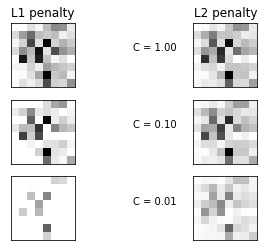

In [5]:
'''
This is the case to demonstrate L1 leading to more sparsity than L2 regularization
'''
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

digits = datasets.load_digits()

X, y = digits.data, digits.target
X = StandardScaler().fit_transform(X)

# classify small against large digits
y = (y > 4).astype(np.int)


# Set regularization parameter
for i, C in enumerate((1, 0.1, 0.01)):
    # turn down tolerance for short training time
    clf_l1_LR = LogisticRegression(C=C, penalty='l1', tol=0.01, solver='saga')
    clf_l2_LR = LogisticRegression(C=C, penalty='l2', tol=0.01, solver='saga')
    clf_l1_LR.fit(X, y)
    clf_l2_LR.fit(X, y)

    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()

    # coef_l1_LR contains zeros due to the
    # L1 sparsity inducing norm

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100

    print("C=%.2f" % C)
    print("Sparsity with L1 penalty: %.2f%%" % sparsity_l1_LR)
    print("score with L1 penalty: %.4f" % clf_l1_LR.score(X, y))
    print("Sparsity with L2 penalty: %.2f%%" % sparsity_l2_LR)
    print("score with L2 penalty: %.4f" % clf_l2_LR.score(X, y))

    l1_plot = plt.subplot(3, 2, 2 * i + 1)
    l2_plot = plt.subplot(3, 2, 2 * (i + 1))
    if i == 0:
        l1_plot.set_title("L1 penalty")
        l2_plot.set_title("L2 penalty")

    l1_plot.imshow(np.abs(coef_l1_LR.reshape(8, 8)), interpolation='nearest',
                   cmap='binary', vmax=1, vmin=0)
    l2_plot.imshow(np.abs(coef_l2_LR.reshape(8, 8)), interpolation='nearest',
                   cmap='binary', vmax=1, vmin=0)
    plt.text(-8, 3, "C = %.2f" % C)

    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())

plt.show()

### <font color = '#0091D0'>1.5	Generalized Linear Models</font>

So far, we've seen a regression example, and a classification example. In the regression example, we had had $y | x ; \theta \sim \mathcal{N}\left(\mu, \sigma^{2}\right)$, and in the classification one, $y|x; θ ∼ Bernoulli(φ)$, for some appropriate definitions of $μ$ and $φ$ as functions of $x$ and $θ$. In this section, we will show that both of these methods are special cases of a broader family of models, called Generalized Linear Models (GLMs). We will also show how other models in the GLM family can be derived and applied to other classification and regression problems.

#### <font color = '#0091D0'>1.5.1	The exponential family</font>

We say that a class of distributions is in the exponential family if it can be written in the form

$$
p(y ; \eta)=b(y) \exp \left(\eta^{T} T(y)-a(\eta)\right)
$$

We write the Bernoulli distribution as:

\begin{equation}
\begin{aligned} p(y ; \phi) &=\phi^{y}(1-\phi)^{1-y} \\ &=\exp (y \log \phi+(1-y) \log (1-\phi)) \\ &=\exp \left(\left(\log \left(\frac{\phi}{1-\phi}\right)\right) y+\log (1-\phi)\right) \end{aligned}
\end{equation}

where

$$
\begin{aligned} T(y) &=y \\ a(\eta) &=-\log (1-\phi) \\ &=\log \left(1+e^{\eta}\right) \\ b(y) &=1 \end{aligned}
$$


#### <font color = '#0091D0'>1.5.2	Construct GLMs</font>
    
Suppose you would like to build a model to estimate the number y of customers arriving in your store (or number of page-views on your website) in any given hour, based on certain features x such as store promotions, recent advertising, weather, day-of-week, etc. We know that the Poisson distribution usually gives a good model for numbers of visitors (i.e., __Building model to forecast demand in the theater in one site, one day, one time slot__). Knowing this, how can we come up with a model for our problem? Fortunately, the Poisson is an exponential family distribution, so we can apply a Generalized Linear Model (GLM). In this section, we will we will describe a method for constructing GLM models for problems such as these. 

More generally, consider a classification or regression problem where we would like to predict the value of some random variable $y$ as a function of $x$. To derive a GLM for this problem, we will make the following three assumptions about the conditional distribution of $y$ given $x$ and about our model:

1. $y | x; θ ∼ Exponential Family(η)$. I.e., given $x$ and $θ$, the distribution of $y$ follows some exponential family distribution, with parameter $η$.  

2. Given $x$, our goal is to predict the expected value of $T(y$) given $x$. In most of our examples, we will have $T(y) = y$, so this means we would like the prediction $h(x)$ output by our learned hypothesis $h$ to satisfy $h(x) = E[y|x]$. (Note that this assumption is satisfied in the choices for $h_{\theta}(x)$ for both logistic regression and linear regression. For instance, in logistic regression, we had $h_{\theta}(x)=p(y=1 | x ; \theta)=0 \cdot p(y=$
$0 | x ; \theta )+1 \cdot p(y=1 | x ; \theta)=\mathrm{E}[y | x ; \theta] . )$  

3. The natural parameter $η$ and the inputs $x$ are related linearly: $\eta=\theta^{T} x$.(Or, if $η$ is vector-valued, then $\eta_{i}=\theta_{i}^{T} x$.)  


#### <font color = '#0091D0'>1.5.3	Softmax Regression</font>
    
We know logistic regression is binary classification. What if we want the output have more than two values.  

For example, rather than classifying email into the two classes spam or not-spam—which would have been a binary classification problem—we might want to classify it into three classes, such as spam, personal mail, and work-related mail. The response variable is still discrete, but can now take on more than two values. We will thus model it as distributed according to a multinomial distribution.  

To parameterize a multinomial over $k$ possible outcomes, one could use $k$ parameters $\phi_{1}$,,, $\phi_{k}$ specifying the probability of each of the outcomes. 

We have:

\begin{equation}
\begin{aligned} p(y ; \phi) &=\phi_{1}^{1\{y=1\}} \phi_{2}^{1\{y=2\}} \dots \phi_{k}^{1\{y=k\}} \\ &=\phi_{1}^{1\{y=1\}} \phi_{2}^{1\{y=2\}} \dots \phi_{k}^{1-\sum_{i=1}^{k-1} 1\{y=i\}} \\ &=\phi_{1}^{(T(y))_{1}} \phi_{2}^{(T(y))_{2}} \ldots \phi_{k}^{1-\sum_{i=1}^{k-1}(T(y))_{i}} \end{aligned}
\end{equation}

$$
\begin{array}{c}{=\exp \left((T(y))_{1} \log \left(\phi_{1}\right)+(T(y))_{2} \log \left(\phi_{2}\right)+\right.} \\ {\ldots+\left(1-\sum_{i=1}^{k-1}(T(y))_{i}\right) \log \left(\phi_{k}\right) )}\end{array}
$$

$$
\begin{aligned}=& \exp \left((T(y))_{1} \log \left(\phi_{1} / \phi_{k}\right)+(T(y))_{2} \log \left(\phi_{2} / \phi_{k}\right)+\right.\\ \cdots+(T(y))_{k-1} \log \left(\phi_{k-1} / \phi_{k}\right)+\log \left(\phi_{k}\right) ) \\=& b(y) \exp \left(\eta^{T} T(y)-a(\eta)\right) \end{aligned}
$$

Where

$$
\eta=\left[ \begin{array}{c}{\log \left(\phi_{1} / \phi_{k}\right)} \\ {\log \left(\phi_{2} / \phi_{k}\right)} \\ {\vdots} \\ {\log \left(\phi_{k-1} / \phi_{k}\right)}\end{array}\right]
$$

\begin{equation}
\begin{aligned} a(\eta) &=-\log \left(\phi_{k}\right) \\ b(y) &=1 \end{aligned}
\end{equation}

$$
\begin{aligned} p(y=i | x ; \theta) &=\phi_{i} \\ &=\frac{e^{\eta_{i}}}{\sum_{j=1}^{k} e^{\eta_{j}}} \\ &=\frac{e^{\theta_{i}^{T} x}}{\sum_{j=1}^{k} e^{\theta_{j}^{T} x}} \end{aligned}
$$

The output is

\begin{equation}
h_{\theta}(x)=\mathrm{E}[T(y) | x ; \theta]
\end{equation}
$$
=\mathrm{E} \left[ \begin{array}{c}{1\{y=1\}} \\ {1\{y=2\}} \\ {\vdots} \\ {1\{y=k-1\}}\end{array}\right| x ; \theta ]
$$

$$
=\left[ \begin{array}{c}{\phi_{1}} \\ {\phi_{2}} \\ {\vdots} \\ {\phi_{k-1}}\end{array}\right]
$$

\begin{equation}
=\left[ \begin{array}{c}{\frac{\exp \left(\theta_{1}^{T} x\right)}{\sum_{j=1}^{k} \exp \left(\theta_{j}^{T} x\right)}} \\ {\frac{\exp \left(\theta_{2}^{T} x\right)}{\sum_{j=1}^{k} \exp \left(\theta_{j}^{T} x\right)}} \\ {\vdots} \\ {\frac{\exp \left(\theta_{k-1}^{T} x\right)}{\sum_{j=1}^{k} \exp \left(\theta_{j}^{T} x\right)}}\end{array}\right]
\end{equation}

The cost function is:

$$
L(\mathbf{w})=\frac{1}{N} \sum_{n=1}^{N} H\left(p_{n}, q_{n}\right)=-\frac{1}{N} \sum_{n=1}^{N}\left[y_{n} \log \hat{y}_{n}+\left(1-y_{n}\right) \log \left(1-\hat{y}_{n}\right)\right]
$$

#### <font color = '#0091D0'>1.5.4	Multi-class Logistic Regression vs Softmax</font>

Now we know Softmax is the extension of LR, and it can handle multi-class classification problem. Actually, we can also use binary LR. Let us say we have 10 classes, if we want to use LR, we can construct 10 LR models corresponding to 10 classes. The output is the class who has the highest probability.  

Suppose you are working on a music classification application, and there are $k$ types of music that you are trying to recognize. Should you use a softmax classifier, or should you build k separate binary classifiers using logistic regression?  

This will depend on whether the four classes are mutually exclusive. For example, if your four classes are classical, country, rock, and jazz, then assuming each of your training examples is labeled with exactly one of these four class labels, you should build a softmax classifier with $k = 4$. (If there' re also some examples that are none of the above four classes, then you can set $k = 5$ in softmax regression, and also have a fifth, "none of the above," class.)

If however your categories are has_vocals, dance, soundtrack, pop, then the classes are not mutually exclusive; for example, there can be a piece of pop music that comes from a soundtrack and in addition has vocals. In this case, it would be more appropriate to build 4 binary logistic regression classifiers. This way, for each new musical piece, your algorithm can separately decide whether it falls into each of the four categories.

In [6]:
'''
Sklearn provides various GLMs, such as Lasso, Ridge, Linear regression, Logistic regression, 
Least Angle regression, Stochastic Gradient Descent 
'''
# This sklearn link introduces the above models. 
# https://scikit-learn.org/stable/modules/linear_model.html

'''
Stochastic gradient descent is a simple yet very efficient approach to fit linear models. 
It is particularly useful when the number of samples (and the number of features) is very large. 
The partial_fit method allows online/out-of-core learning.

The classes SGDClassifier and SGDRegressor provide functionality to fit linear models for classification and regression 
using different (convex) loss functions and different penalties. E.g., with loss="log", SGDClassifier fits a logistic regression model, 
while with loss="hinge" it fits a linear support vector machine (SVM).
'''

'\nStochastic gradient descent is a simple yet very efficient approach to fit linear models. \nIt is particularly useful when the number of samples (and the number of features) is very large. \nThe partial_fit method allows online/out-of-core learning.\n\nThe classes SGDClassifier and SGDRegressor provide functionality to fit linear models for classification and regression \nusing different (convex) loss functions and different penalties. E.g., with loss="log", SGDClassifier fits a logistic regression model, \nwhile with loss="hinge" it fits a linear support vector machine (SVM).\n'

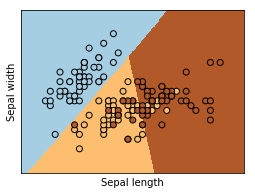

In [7]:
'''
Logistis Regreesion multiple-class classification
'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

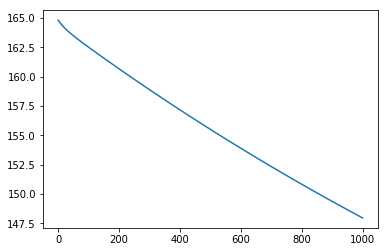

In [2]:
'''
This is an example of how to implement softmax regression with L2 regularization
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.sparse

from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
x = iris.data[:, :2]  # we only take the first two features.
y = iris.target

def getLoss(w,x,y,lam):
    m = x.shape[0] #First we get the number of training examples
    y_mat = constructSparse(y) #Next we convert the integer class coding into a one-hot representation
    scores = np.dot(x,w) #Then we compute raw class scores given our input and current weights
    prob = softmax(scores) #Next we perform a softmax on these scores to get their probabilities
    loss = (-1 / m) * np.sum(y_mat * np.log(prob)) + (lam/2)*np.sum(w*w) #We then find the loss of the probabilities
    grad = (-1 / m) * np.dot(x.T,(y_mat - prob)) + lam*w #And compute the gradient for that loss
    return loss,grad

# We must convert y into sparse matrix
def constructSparse(Y):
    m = Y.shape[0]
    #Y = Y[:,0]
    OHX = scipy.sparse.csr_matrix((np.ones(m), (Y, np.array(range(m)))))
    OHX = np.array(OHX.todense()).T
    return OHX



def softmax(z):
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z),axis=1)).T
    return sm

def getProbsAndPreds(someX):
    probs = softmax(np.dot(someX,w))
    preds = np.argmax(probs,axis=1)
    return probs,preds



w = np.zeros([x.shape[1],len(np.unique(y))])
lam = 1
iterations = 1000
learningRate = 1e-5
losses = []
for i in range(0,iterations):
    loss,grad = getLoss(w,x,y,lam)
    losses.append(loss)
    w = w - (learningRate * grad)



plt.plot(losses)

In [10]:
scores = np.dot(x,w)
softmax(scores)

array([[ 0.3893842 ,  0.29820557,  0.31241023],
       [ 0.35098587,  0.31487309,  0.33414104],
       [ 0.38228301,  0.30207763,  0.31563936],
       [ 0.37799647,  0.30411828,  0.31788526],
       [ 0.40552427,  0.29147285,  0.30300288],
       [ 0.4127695 ,  0.28753632,  0.29969417],
       [ 0.40861746,  0.29094147,  0.30044107],
       [ 0.38506761,  0.30025872,  0.31467367],
       [ 0.36948089,  0.30816916,  0.32234995],
       [ 0.36079928,  0.31075841,  0.32844231],
       [ 0.39218721,  0.2963848 ,  0.31142799],
       [ 0.39678437,  0.29565024,  0.30756539],
       [ 0.35661433,  0.31273553,  0.33065014],
       [ 0.38531585,  0.30161845,  0.3130657 ],
       [ 0.39935256,  0.29249795,  0.30814949],
       [ 0.44710546,  0.27199071,  0.28090383],
       [ 0.4127695 ,  0.28753632,  0.29969417],
       [ 0.3893842 ,  0.29820557,  0.31241023],
       [ 0.38481393,  0.29890077,  0.31628531],
       [ 0.42030601,  0.2848636 ,  0.2948304 ],
       [ 0.36203152,  0.30915406,  0.328

In [9]:
'''
Sklearn also provides Multiclass and multilabel algorithms, such as OneVsRestClassifier

https://scikit-learn.org/stable/modules/multiclass.html#multiclass-and-multilabel-algorithms
'''

'\nSklearn also provides Multiclass and multilabel algorithms, such as OneVsRestClassifier\n\nhttps://scikit-learn.org/stable/modules/multiclass.html#multiclass-and-multilabel-algorithms\n'

### <font color = '#0091D0'>1.6	Cross Validation</font>
    
This section covers the very importance phrase in model training and evaluation. 
Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test. Note that the word "experiment" is not intended to denote academic use only, because even in commercial settings machine learning usually starts out experimentally. Here is a flowchart of typical cross validation workflow in model training.

<img src="https://i.postimg.cc/02K4RT1M/12.png" width = "300">

Cross validation can be used to find the most optimal learning rate, parameter lambda in regularization, model selection, etc. 


#### <font color = '#0091D0'>1.6.1	K-fold</font>
    
KFold divides all the samples in  groups of samples, called folds (if , this is equivalent to the Leave One Out strategy), of equal sizes (if possible). The prediction function is learned using  folds, and the fold left out is used for test.  

Here is a visualization of the cross-validation behavior. 

<img src="https://i.postimg.cc/bYB55zWf/13.png" width = "400">

#### <font color = '#0091D0'>1.6.2	Leave One Out (LOO)</font>
    
LeaveOneOut (or LOO) is a simple cross-validation. Each learning set is created by taking all the samples except one, the test set being the sample left out. Thus, for samples, we have different training sets and different tests set. This cross-validation procedure does not waste much data as only one sample is removed from the training set.



In [10]:
'''
Cross validation is to estimate the model performance, the most common method is to split the data into training and testing set. 

The size of training set must be larger than that of test set. Actually, the split rule should consider the uniqueness of the project. 
'''

# Reference: https://scikit-learn.org/stable/modules/cross_validation.html

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

iris = datasets.load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test) 

0.9666666666666667


Cross validation can be used to do model selection and parameter tunning
In sklearn, GridSearchCV is a good funtion to find the best hyper parameter 



C:\Users\zhihao.fang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\zhihao.fang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


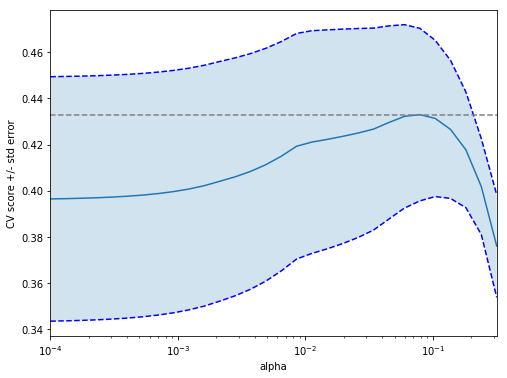

In [11]:
'''
Cross validation can be used to do model selection and parameter tunning
In sklearn, GridSearchCV is a good funtion to find the best hyper parameter 
'''

from __future__ import print_function
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]

lasso = Lasso(random_state=0)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X, y)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

plt.show()

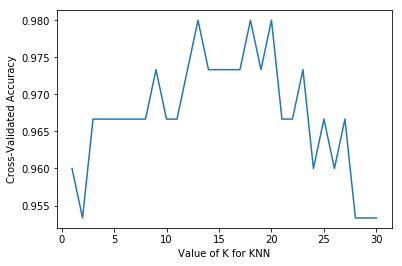

In [12]:
'''
cross_val_score is a good tool to find the best parameter
'''
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

# Thw option of scoring 
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

iris = load_iris()
X = iris.data
y = iris.target
import matplotlib.pyplot as plt


k_range = range(1, 31)
k_scores = []

# Loop
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy') # K-fold cross validation 
    k_scores.append(scores.mean())

#Visualization
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()



### <font color = '#0091D0'>1.7	Model Performance Indicator</font>

Scikit learn provides various metrics to measure the model performance.

__[https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score]__
#### <font color = '#0091D0'>1.7.1	Precision and Recall</font>
    
Let us dive into the concept of precision and recall.

<img src="https://i.postimg.cc/xdjD26Pw/14.png" width = "500">

Let us explain it using logistic regression.   

True Positive: Prediction is 1 and actual value is 1.  
False Positive: Prediction is 1 and actual value is 0.  
False Negative: Prediction is 0 and actual value is 1.  
True Negative: Prediction is 0 and actual value is 0. 

Precision means how many real positive cases are identify among all the positive predictions. On the other hand, recall refers to the percentage of total relevant results correctly classified by your algorithm.  

For example, there are 60 positive samples, 40 negative sample. The model predicts 50 positive samples but there are only 40 samples are true positive and it predicts 50 negative samples yet there are only 30 samples are true negative.  

So

$$
\begin{array}{c}{\mathrm{TP}=40} \\ {\mathrm{FP} : 10} \\ {\mathrm{TN} : 30} \\ {\mathrm{FN} : 20} \\ {\text { Precision }=40 / 50=80 \%} \\ {\text { Recall }=40 /(40+20)=2 / 3}\end{array}
$$

It is very intuitive that higher precision leads to lower recall. So there is trade-off between precision and recall.

#### <font color = '#0091D0'>1.7.2	AUC and ROC</font>
    
Still use LR as example.   
\begin{equation}
Y=\begin{array}{l}{1, p>\text { threshold }} \\ {0, p<\text {threshold}}\end{array}
\end{equation}

True Positive Rate = Recall = TP/(TP + FN)  
False Positive Rate = FP/(TN + FP)  
If we change the threshold, the TPR and FTP will change correspondingly.  
Below is the ROC curve and the area of ROC is the AUC value.  

It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease.

<img src="https://i.postimg.cc/YC1yjQ9t/15.png" width = "200">




In [13]:
'''
This is an example introducing various MPI(model performance indicator) 

'''

# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

from sklearn.metrics import *
import numpy as np
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
precision_score(y_true, y_pred, average='macro') 
recall_score(y_true, y_pred, average = 'macro')

y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
roc_auc_score(y_true, y_scores)



0.75

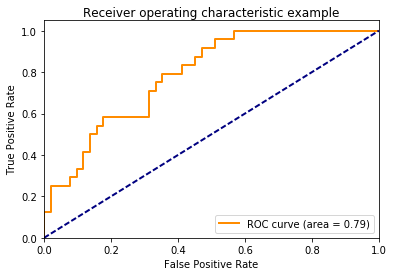

In [7]:
'''
This is the example of ROC curve and AUC 
'''
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

#### <font color = '#0091D0'>1.7.3	Lorenz Curve and Gini Coefficient</font>
    
This section covers the Gini Coefficient and graphical representation of it, which is Lorenz Curve.

##### <font color = '#0091D0'>1.7.3.1	Traditional Definition and Usage</font>
    
The Gini Coefficient or Gini Index measures the inequality among the values of a variable. Higher the value of an index, more dispersed is the data. Alternatively, the Gini coefficient can also be calculated as the half of the relative mean absolute difference.  

The Gini coefficient is usually defined mathematically based on the Lorenz curve, which plots the proportion of the total income of the population (y-axis) that is cumulatively earned by the bottom x% of the population.  

The line at 45 degrees thus represents perfect equality of incomes.  

<img src="https://i.postimg.cc/XJDst82k/16.png" width = "400">
<img src="https://i.postimg.cc/VkWQpxX9/17.png" width = "400">

Gini Coefficient, $G = A / (A + B)$

##### <font color = '#0091D0'>1.7.3.2	Application in Model Evaluation</font>

Say now we are explaining Logistic model to our client, Lorenz is a useful tool to give intuitive explanation.   
After rank-ordering the population by the predicted values, shows how many actual "targets" are captured by each percentile of the population

<img src="https://i.postimg.cc/1tjbQPWT/18.png" width = "500">



0.6766666666666667


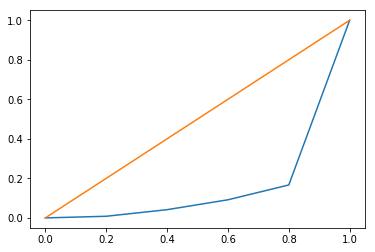

In [15]:
'''
How to plot lorenz curve and calcluate gini 
'''

import numpy as np
import matplotlib.pyplot as plt

# ensure your arr is sorted from lowest to highest values first!
arr = np.array([1,4,6,9,100])

def gini(arr):
    count = arr.size
    coefficient = 2 / count
    indexes = np.arange(1, count + 1)
    weighted_sum = (indexes * arr).sum()
    total = arr.sum()
    constant = (count + 1) / count
    return coefficient * weighted_sum / total - constant

def lorenz(arr):
    # this divides the prefix sum by the total sum
    # this ensures all the values are between 0 and 1.0
    scaled_prefix_sum = arr.cumsum() / arr.sum()
    # this prepends the 0 value (because 0% of all people have 0% of all wealth)
    return np.insert(scaled_prefix_sum, 0, 0)

# show the gini index!
print(gini(arr))

lorenz_curve = lorenz(arr)

# we need the X values to be between 0.0 to 1.0
plt.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve)
# plot the straight line perfect equality curve
plt.plot([0,1], [0,1])
plt.show()

### <font color = '#0091D0'>1.7.4	K-S Score </font>

K-S or Kolmogorov-Smirnov chart measures performance of classification models. More accurately, K-S is a measure of the degree of separation between the positive and negative distributions. The K-S is 100 if the scores partition the population into two separate groups in which one group contains all the positives and the other all the negatives. On the other hand, If the model cannot differentiate between positives and negatives, then it is as if the model selects cases randomly from the population. The K-S would be 0. In most classification models the K-S will fall between 0 and 100, and that the higher the value the better the model is at separating the positive from negative cases.

__[https://www.saedsayad.com]__

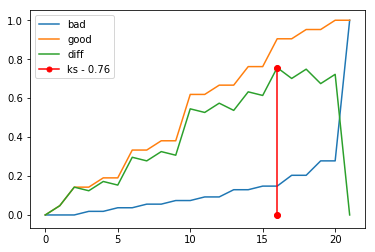

In [17]:
# import numpy as np
# from sklearn import metrics
# import matplotlib.pyplot as plt
# y = np.array([1, 1, 2, 2])
# scores = np.array([0.1, 0.4, 0.35, 0.8])
# fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
# ks_value = max(abs(fpr-tpr))

# # 画图，画出曲线
# plt.plot(fpr, label='bad')
# plt.plot(tpr, label='good')
# plt.plot(abs(fpr-tpr), label='diff')

# x = np.argwhere(abs(fpr-tpr) == ks_value)[0, 0]
# plt.plot((x, x), (0, ks_value), label='ks - {:.2f}'.format(ks_value), color='r', marker='o', markerfacecolor='r', markersize=5)
# plt.scatter((x, x), (0, ks_value), color='r')
# plt.legend()
# plt.show()


import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    
fpr = fpr[0]
tpr = tpr[0]
ks_value = max(abs(fpr-tpr))

plt.plot(fpr, label='bad')
plt.plot(tpr, label='good')
plt.plot(abs(fpr-tpr), label='diff')

x = np.argwhere(abs(fpr-tpr) == ks_value)[0, 0]
plt.plot((x, x), (0, ks_value), label='ks - {:.2f}'.format(ks_value), color='r', marker='o', markerfacecolor='r', markersize=5)
plt.scatter((x, x), (0, ks_value), color='r')
plt.legend()
plt.show()


### <font color = '#0091D0'>1.7.5 Regression Model Evaluation </font>

Those metrics introduced above are used to measure model performance for classification. For regression model, there are more precise methods.


#### <font color = '#0091D0'>1.7.5.1 R square </font>

The r2_score function computes $R²$, the coefficient of determination. It provides a measure of how well future samples are likely to be predicted by the model. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of $y$, disregarding the input features, would get a $R^2$ score of 0.0.

If $y_{i}$ is the predicted value of the i-th sample and $y_{i}$ is the corresponding true value, then the score $R²$ estimated over  is defined as

\begin{equation}
R^{2}(y, \hat{y})=1-\frac{\sum_{i=0}^{n_{\text { semples }}-1}\left(y_{i}-\hat{y}_{i}\right)^{2}}{\sum_{i=0}^{n_{\text { semples }}-1}\left(y_{i}-\overline{y}\right)^{2}}
\end{equation}



In [12]:
from sklearn.metrics import r2_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
r2_score(y_true, y_pred)

0.94860813704496794

#### <font color = '#0091D0'>1.7.5.2 Explained Variance Score </font>

If $\hat{y}$ is the estimated target output $y$,  the corresponding (correct) target output, and Var is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

$$
(y, \hat{y})=1-\frac{\operatorname{Var}\{y-\hat{y}\}}{\operatorname{Var}\{y\}}
$$


The best possible score is 1.0, lower values are worse.

Apart from these 2 metrics, there are other common indicators like MAE,MSE,ME.


In short, the decision of metric should depend on the real requirement in the project. For example, we must consider if certain metric is easy to explain to client. 

## <font color='#0091D0'>2	Feature Engineering</font>

This sector describes the popular methods in feature selection.   

So far, we have introduced linear and logistic regression, including the algorithm, cost function, algorithm optimization, variance-bias trade-off, cross validation to do parameter selection and model evaluation, model performance indicator. In short, it covered model training, model evaluation, model explanation. However, in real business world, almost 80% of time is not spent in model but data preparation and data processing. We all know there is a famous rule “riro” which is “rubbish in, rubbish out”. It reflects the fact that data processing is a fundamental and most crucial part in ML.  Here are questions may be considered in the beginning:

+ What kind of problem it is? regression or classification?
+ How to get the data?
+ How to deal with data sparsity and missing data problem?
+ What kind of data is required for real business problem?
+ Is the raw data enough or any new features should be derived?
+ How to choose features, depending on mathematical analysis or business insights?
+ …
For this sake, instead of continuing introducing other models, it’s better to cover feature engineering.

### <font color='#0091D0'>2.1	Missing Data</font>

One of the most common problems I have faced in Data Cleaning/Exploratory Analysis is handling the missing values. Firstly, <mark>understand that there is NO good way to deal with missing data.<mark>
    
<img src="https://i.postimg.cc/yxFqXtPb/19.png" width = "500">

#### <font color='#0091D0'>2.1.1	Imputation vs Removing Data</font>

Before jumping to the methods of data imputation, we have to understand the reason why data goes missing.   

+ Missing at Random (MAR): Missing at random means that the propensity for a data point to be missing is not related to the missing data, but it is related to some of the observed data.  
+ Missing Completely at Random (MCAR): The fact that a certain value is missing has nothing to do with its hypothetical value and with the values of other variables.  
+ Missing not at Random (MNAR): Two possible reasons are that the missing value depends on the hypothetical value (e.g. People with highsalaries generally do not want to reveal their incomes in surveys) or missing value is dependent on some other variable’s value (e.g. Let’s assume that females generally don’t want to reveal their ages! Here the missing value in age variable is impacted by gender variable).  

In the first two cases, it is safe to remove the data with missing values depending upon their occurrences, while in the third case removing observations with missing values can produce a bias in the model. So we have to be really careful before removing observations. Note that imputation does not necessarily give better results.  

<mark>It is always better to keep data than to discard it.</mark> Sometimes you can drop variables if the data is missing for more than 60% observations but only if that variable is insignificant. Having said that, imputation is always a preferred choice over dropping variables.

##### <font color='#0091D0'>2.1.1.1	Linear Interpolation</font>

This method works well for a time series with some trend.

##### <font color='#0091D0'>2.1.1.2	Mean, Median and Mode</font>

Computing the overall mean, median or mode is a very basic imputation method, it is the only tested function that takes no advantage of the time series characteristics or relationship between the variables. It is very fast, but has clear disadvantages. One disadvantage is that mean imputation reduces variance in the dataset.

##### <font color='#0091D0'>2.1.1.3	Linear Regression</font>

To begin, several predictors of the variable with missing values are identified using a correlation matrix. The best predictors are selected and used as independent variables in a regression equation. The variable with missing data is used as the dependent variable. Cases with complete data for the predictor variables are used to generate the regression equation; the equation is then used to predict missing values for incomplete cases. In an iterative process, values for the missing variable are inserted and then all cases are used to predict the dependent variable. These steps are repeated until there is little difference between the predicted values from one step to the next, that is they converge.  

There are several disadvantages of this model which tend to outweigh the advantages. First, because the replaced values were predicted from other variables they tend to fit together "too well" and so standard error is deflated. One must also assume that there is a linear relationship between the variables used in the regression equation when there may not be one.

##### <font color='#0091D0'>2.1.1.4	KNN (K Nearest Neighbors)</font>

There are other machine learning techniques like XGBoost and Random Forest for data imputation but we will be discussing KNN as it is widely used. In this method, k neighbors are chosen based on some distance measure and their average is used as an imputation estimate. The method requires the selection of the number of nearest neighbors, and a distance metric. KNN can predict both discrete attributes (the most frequent value among the k nearest neighbors) and continuous attributes (the mean among the k nearest neighbors).  

The distance metric varies according to the type of data:  

1. Continuous Data: The commonly used distance metrics for continuous data are Euclidean, Manhattan and Cosine.  
2. Categorical Data: Hamming distance is generally used in this case. It takes all the categorical attributes and for each, count one if the value is not the same between two points. The Hamming distance is then equal to the number of attributes for which the value was different. 

One of the most attractive features of the KNN algorithm is that it is simple to understand and easy to implement. The non-parametric nature of KNN gives it an edge in certain settings where the data may be highly “unusual”.  

One of the obvious drawbacks of the KNN algorithm is that it becomes time-consuming when analyzing large datasets because it searches for similar instances through the entire dataset. Furthermore, the accuracy of KNN can be severely degraded with high-dimensional data because there is little difference between the nearest and farthest neighbor.

##### <font color='#0091D0'>2.1.1.5	Other Algorithms</font>

Of course, we can choose some other models like random forest and Xgboost which tolerate missing data issue. 

##### <font color='#0091D0'>2.1.1.5	Other Algorithms</font>

<mark>I want to expand a little bit on missing data. In the real project, the data may be extremely complex, the simple imputation might not reflect the real pattern. In this case, other approaches are required to proposed to solve this issue. <mark>

For example, if we are dealing with ticket data, we can derive weekday factors. Therefore, in one site, the missing data of Wed can be imputed by the data of Thus.

In [16]:
'''
Sklearn provides a imputation method handling missing data

A basic strategy to use incomplete datasets is to discard entire rows and/or columns containing missing values. 
However, this comes at the price of losing data which may be valuable (even though incomplete). 
A better strategy is to impute the missing values, i.e., to infer them from the known part of the data
'''
# https://scikit-learn.org/stable/modules/impute.html#impute

import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
data = [[1, 2], [np.nan, 3], [7, 6]]
imp.fit(data)  

X = [[np.nan, 2], [6, np.nan], [7, 6]]
print(imp.transform(X))  

[[4.         2.        ]
 [6.         3.66666667]
 [7.         6.        ]]



### <font color='#0091D0'>2.2	Data Preprocessing</font>

#### <font color='#0091D0'>2.2.1	Standardization</font>

Standardization of datasets is a common requirement for many machine learning estimators. They might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.   

In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

#### <font color='#0091D0'>2.2.2	Encoding</font>

##### <font color='#0091D0'>2.2.2.1	Encoding categorical features</font>

Often features are not given as continuous values but categorical. For example a person could have features ["male", "female"], ["from Europe", "from US", "from Asia"], ["uses Firefox", "uses Chrome", "uses Safari", "uses Internet Explorer"]. Such features can be efficiently coded as integers, for instance ["male", "from US", "uses Internet Explorer"] could be expressed as [0, 1, 3] while ["female", "from Asia", "uses Chrome"] would be [1, 2, 1].


##### <font color='#0091D0'>2.2.2.2	WOE</font>

###### <font color='#0091D0'>2.2.2.2.1	Overview</font>

The purpose of the Weight of Evidence (WoE) module is to provide flexible tools to recode the values in continuous and categorical predictor variables into discrete categories automatically, and to assign to each category a unique Weight-of-Evidence value. This recoding is conducted in a manner that will produce the largest differences between the recoded groups with respect to the WoE values.

###### <font color='#0091D0'>2.2.2.2.2	Application</font>

The methods described here were developed primarily for the credit and financial industries to aid in building models to predict the risk of loan default. Once a history of data exists describing the performance of loans, meaningful prediction models can be built to predict the probability of loan default based on various characteristics (inputs or predictors) describing the applicant and/or application. A typical example of the results of such models is the "Scorecard”, where applicant characteristics such as the age of a person or business, previous credit history, and so on are linked to expected default probability (risk), expressed as a "Credit Score".

###### <font color='#0091D0'>2.2.2.2.3	Formula</font>

The Weight of Evidence or WoE value is a widely used measure of the "strength” of a grouping for separating good and bad risk (default). It is computed from the basic odds ratio:
(Distribution of Good Credit Outcomes) / (Distribution of Bad Credit Outcomes)  

Or the ratios of Distr Goods / Distr Bads for short, where Distr refers to the proportion of Goods or Bads in the respective group, relative to the column totals, i.e., expressed as relative proportions of the total number of Goods and Bads.  

Specifically, the Weight of Evidence value for a group consisting of n observations is computed as:  

$$
W o E=\left[\ln \left(\frac{D i s t r G o o d s}{D i s t r B a d s}\right)\right] * 100
$$

The WoE recoding of predictors is particularly well suited for subsequent modeling using Logistic Regression. Specifically, logistic regression will fit a linear regression equation of predictors (or WoE-coded continuous predictors) to predict the logit-transformed binary Goods/Bads dependent or Y variable.

__[WOE example]("https://medium.com/@sundarstyles89/weight-of-evidence-and-information-value-using-python-6f05072e83eb")__

#### <font color='#0091D0'>2.2.3	Feature binarization</font>

Feature binarization is the process of thresholding numerical features to get boolean values. This can be useful for downstream probabilistic estimators that make assumption that the input data is distributed according to a multi-variate Bernoulli distribution.


In [17]:
'''
Standardization of data set
'''
# https://scikit-learn.org/stable/modules/preprocessing.html

from sklearn import preprocessing
import numpy as np

X_train = np.array([[ 1., -1.,  2.],[ 2.,  0.,  0.],[ 0.,  1., -1.]])

scaler = preprocessing.StandardScaler().fit(X_train)
scaler.transform(X_train)  

X_test = [[-1., 1., 0.]]
scaler.transform(X_test) 

'''
Normalization
'''
X = [[ 1., -1.,  2.], [ 2.,  0.,  0.], [ 0.,  1., -1.]]
normalizer = preprocessing.Normalizer().fit(X)  # fit does nothing
normalizer.transform(X) 
normalizer.transform([[-1.,  1., 0.]]) 

'''
Encoding categorical features
'''

enc = preprocessing.OrdinalEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)  
enc.transform([['female', 'from US', 'uses Safari']])


array([[0., 1., 1.]])

### <font color='#0091D0'>2.3	Feature Selection</font>

#### <font color='#0091D0'>2.3.1	Filter</font>

##### <font color='#0091D0'>2.3.1.1	Variance Threshold</font>

It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.

##### <font color='#0091D0'>2.3.1.2	Chi Square</font>

Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. we can perform a $\chi^{2}$ test to the samples to retrieve best top $N$ features.  $\chi^{2}$ test is a statistical test method to determine whether or not there is strong relationship between 2 variables.

__[Chi Square Test Example]("https://wiki.mbalib.com/wiki/%E5%8D%A1%E6%96%B9%E6%A3%80%E9%AA%8C")__


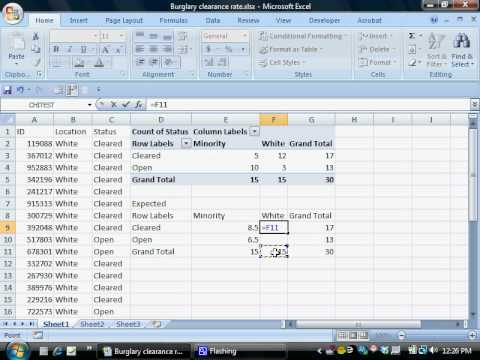

In [5]:
# Below is the demo upon how to do chi square test in excel

from IPython.display import YouTubeVideo
YouTubeVideo('ODxEoDyF6RI', width=800, height=300)

In [ ]:
'''
Step-wise regression is an algorithm based on p-value of coefficient. It includes 2 methods, forward and backward.
Forward: In each step, certain feature with minimum p value would be added into feature pool
Backward: In each step, certain feature with maximum p value would be removed from feature pool.
'''

from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import statsmodels.api as sm

data = load_boston()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target


def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

##### <font color='#0091D0'>2.3.1.3	Correlation Method</font>

Calculate the correlation between each x and y and choose xs with top highest correlation value.

#### <font color='#0091D0'>2.3.2	Wrapper Method</font>

##### <font color='#0091D0'>2.3.2.1	L1-based feature selection</font>

Linear models penalized with the $L1$ norm have sparse solutions: many of their estimated coefficients are zero. 

##### <font color='#0091D0'>2.3.2.2	Tree-based feature selection</font>

Tree-based estimators can be used to compute feature importance, which in turn can be used to discard irrelevant features.


#### <font color='#0091D0'>2.3.3	Embedded Method</font>
#### <font color='#0091D0'>2.3.3.1	Feature Derivation</font>

It's required to derive new variables using raw data to meet the requirements for some real business problem. The derivation can not be determined by automatic feature selection. In this case, analysis must be introduced, such as looking up the references for mathematical formula, the insights from experts, etc. 

#### <font color='#0091D0'>2.3.3.2	Tree-based feature selection</font>


In [18]:
'''
Feature selection in sklearn
'''
# https://scikit-learn.org/stable/modules/feature_selection.html


'\nFeature selection in sklearn\n'

In [26]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from scipy.stats import pearsonr
import numpy as np
iris = load_iris()
#选择K个最好的特征，返回选择特征后的数据
#第一个参数为计算评估特征是否好的函数，该函数输入特征矩阵和目标向量，输出二元组（评分，P值）的数组，数组第i项为第i个特征的评分和P值。在此定义为计算相关系数
#参数k为选择的特征个数
SelectKBest(lambda X, Y: np.array(list(map(lambda x: pearsonr(x, Y)[0], X.T))).T, k=2).fit_transform(iris.data, iris.target)


In [25]:
data = {'list 1':[2,4,6,8],'list 2':[4,16,36,64]}

import pandas as pd #To Convert your lists to pandas data frames convert your lists into pandas dataframes

df = pd.DataFrame(data, columns = ['list 1','list 2'])

from scipy import stats # For in-built method to get PCC

pearson_coef, p_value = stats.pearsonr(df["list 1"], df["list 2"]) #define the columns to perform calculations on
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value) # Results 

('Pearson Correlation Coefficient: ', 0.98437403869769724, 'and a P-value of:', 0.015625961302302763)


In [20]:
# Correlation matrix can be dirived via pandas

import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9
0,1,0.347533,0.398948,0.455743,0.0729144,-0.233402,-0.731222,0.477978,-0.442621,0.0151847
1,0.347533,1,-0.284056,0.571003,-0.285483,0.38248,-0.362842,0.642578,0.252556,0.190047
2,0.398948,-0.284056,1,-0.523649,0.152937,-0.139176,-0.0928948,0.0162655,-0.434016,-0.383585
3,0.455743,0.571003,-0.523649,1,-0.225343,-0.227577,-0.481548,0.473286,0.279258,0.44665
4,0.0729144,-0.285483,0.152937,-0.225343,1,-0.104438,-0.147477,-0.523283,-0.614603,-0.189916
5,-0.233402,0.38248,-0.139176,-0.227577,-0.104438,1,-0.0302517,0.41764,0.205851,0.0950844
6,-0.731222,-0.362842,-0.0928948,-0.481548,-0.147477,-0.0302517,1,-0.49444,0.381407,-0.353652
7,0.477978,0.642578,0.0162655,0.473286,-0.523283,0.41764,-0.49444,1,0.375873,0.417863
8,-0.442621,0.252556,-0.434016,0.279258,-0.614603,0.205851,0.381407,0.375873,1,0.150421
9,0.0151847,0.190047,-0.383585,0.44665,-0.189916,0.0950844,-0.353652,0.417863,0.150421,1


#### <font color='#0091D0'>2.3.5	Principal Component Analysis</font>

##### <font color='#0091D0'>2.3.5.1	Introduction</font>

Suppose we are given a dataset ${x(i); i = 1, . . , m}$ of attributes of m different types of automobiles, such as their maximum speed, turn radius, and so on. Let $x(i) ∈ R_{n}$, for each $i (n ≪ m)$. But unknown to us, two different attributes—some x_{i} and x_{j}—respectively give a car's maximum speed measured in miles per hour, and the maximum speed measured in kilometers per hour. These two attributes are therefore almost linearly dependent, up to only small differences introduced by rounding off to the nearest mph or kph. Thus, the data really lies approximately on an $n − 1$ dimensional subspace. How can we automatically detect, and perhaps remove, this redundancy?  
For a less contrived example, consider a dataset resulting from a survey of pilots for radio-controlled helicopters, where $x_{1}^{i}$ is a measure of the piloting skill of pilot $i$, and $x_{2}^{i}$ captures how much he/she enjoys flying. Because RC helicopters are very difficult to fly, only the most committed students, ones that truly enjoy flying, become good pilots. So, the two attributes $x_{1}$ and $x_{2}$ are strongly correlated. Indeed, we might posit that that the data actually likes along some diagonal axis (the $u_{1}$ direction) capturing the intrinsic piloting “karma” of a person, with only a small amount of noise lying off this axis. (See figure.) How can we automatically compute this $u_{1}$ direction?

<img src="https://i.postimg.cc/t4d0VKTZ/20.png" width = "300">

We will shortly develop the PCA algorithm. But prior to running PCA per se, typically we first pre-process the data to normalize its mean and variance, as follows:

1. Let $\mu=\frac{1}{m} \sum_{i=1}^{m} x^{(i)}$.
2. Replace each $x^{i}$ with $x^{i} - u$
3. Let $\sigma_{j}^{2}=\frac{1}{m} \sum_{i}\left(x_{j}^{(i)}\right)^{2}$.
4. Replace each $x^{i}$ with $x_{j}^{(i)} / \sigma_{j}$.

Consider the following dataset, on which we have already carried out the normalization steps.

<img src="https://i.postimg.cc/bwfcryzf/21.png" width = "300">

Now, suppose we pick u to correspond the direction shown in the figure below. The circles denote the projections of the original data onto this line.

<img src="https://i.postimg.cc/LsmckxYy/22.png" width = "300">

We see that the projected data still has a fairly large variance, and the points tend to be far from zero. In contrast, suppose had instead picked the following direction:  

Here, the projections have a significantly smaller variance, and are much closer to the origin.  

We would like to automatically select the direction $u$ corresponding to the first of two figures shown above. To formalize this, note that given a unit vector $u$ and a point $x$, the length of the projection of $x$ onto $u$ is given
by $x^{T}u$. I.e., if $x_{i}$ is a point in our dataset (one of the crosses in the plot), then its projection onto $u$ (the corresponding circle in the figure) is distance $x^{T}u$ from the origin. Hence, to maximize the variance of the projections, we would like to choose a unit-length u so as to maximize:

$$
\begin{aligned} \frac{1}{m} \sum_{i=1}^{m}\left(x^{(i)^{T}} u\right)^{2} &=\frac{1}{m} \sum_{i=1}^{m} u^{T} x^{(i)} x^{(i) T} u \\ &=u^{T}\left(\frac{1}{m} \sum_{i=1}^{m} x^{(i)} x^{(i)^{T}}\right) u \end{aligned}
$$

We easily recognize that the maximizing this subject to $||u||^{2} = 1$ gives the principal eigenvector of  $\sum=\frac{1}{m} \sum_{i=1}^{m} x^{(i)} x^{(i)^{T}}$, which is just the empirical covariance matrix of the data (assuming it has zero mean).

To summarize, we have found that if we wish to find a 1-dimensional subspace with to approximate the data, we should choose $u$ to be the principal eigenvector of $\Sigma$. More generally, if we wish to project our data into a k-dimensional subspace ($k < n$), we should choose $u_{1}$, . . . , $u_{k}$ to be the top $k$ eigenvectors of $\Sigma$. The $u_{i}$' s now form a new, orthogonal basis for the data.

Then, to represent $x_{(i)}$ in this basis, we need only compute the corresponding vector.

$$
y^{(i)}=\left[ \begin{array}{c}{u_{1}^{T} x^{(i)}} \\ {u_{2}^{T} x^{(i)}} \\ {\vdots} \\ {u_{k}^{T} x^{(i)}}\end{array}\right] \in \mathbb{R}^{k}
$$

Thus, whereas $x_i ∈ R_{n}$, the vector $y(i)$ now gives a lower, k-dimensional, approximation/representation for $x_{i}$. PCA is therefore also referred to as a dimensionality reduction algorithm. The vectors $u_{1}$, . . . , $u_{k}$ are called the first $k$ principal components of the data.

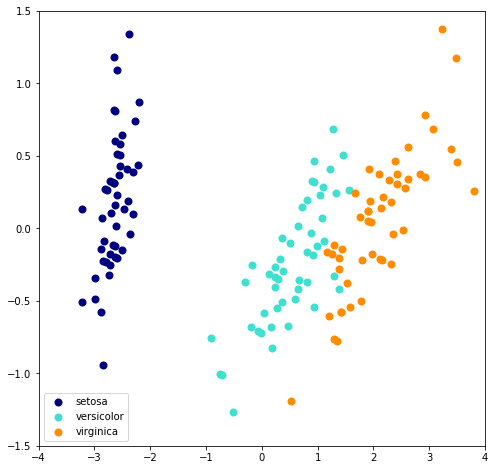

In [19]:
'''
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
'''

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, IncrementalPCA

iris = load_iris()
X = iris.data
y = iris.target

n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)
colors = ['navy', 'turquoise', 'darkorange']


plt.figure(figsize=(8, 8))
for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],color=color, lw=2, label=target_name)

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.axis([-4, 4, -1.5, 1.5])    
plt.show()


##### <font color='#0091D0'>2.3.5.2	Number of components to retain</font>

How do we set $k$; i.e., how many PCA components should we retain? In our simple 2 dimensional example, it seemed natural to retain 1 out of the 2 components, but for higher dimensional data, this decision is less trivial. If $k$ is too large, then we won't be compressing the data much; in the limit of  $k=n$, then we're just using the original data (but rotated into a different basis). Conversely, if $k$ is too small, then we might be using a very bad approximation to the data.  

To decide how to set $k$, we will usually look at the percentage of variance retained for different values of $k$. Concretely, if $k=n$, then we have an exact approximation to the data, and we say that 100% of the variance is retained. I.e., all of the variation of the original data is retained. Conversely, if $k=0$, then we are approximating all the data with the zero vector, and thus 0% of the variance is retained.

More generally, let \lambda_1,\ \lambda_2,…,\ \lambda_n be the eigenvalues of \Sigma(sorted in decreasing order), so that \lambda_j\ is the eigenvalue corresponding to the eigenvector\ u_1. Then if we retain k principal components, the percentage of variance retained is given by:

\begin{equation}
\frac{\sum_{j=1}^{k} \lambda_{j}}{\sum_{j=1}^{n} \lambda_{j}}
\end{equation}

For more details, go to __[here](http://ufldl.stanford.edu/wiki/index.php/PCA)__.

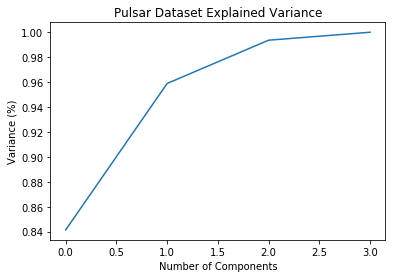

This plot tells us that selecting 2 components we can preserve something around 98.8% or 99% of the total variance of the data.It makes sense, we’ll not use 100% of our variance, because it denotes all components, and we want only the principal ones.


In [20]:
'''
Choosing the Number of Components in a Principal Component Analysis
'''
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.preprocessing import MinMaxScaler

iris = load_iris()
X = iris.data
y = iris.target

scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(X)

#Fitting the PCA algorithm with our Data
pca = PCA().fit(data_rescaled)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

print("This plot tells us that selecting 2 components we can preserve something around 98.8% or 99% of the total variance of the data.It makes sense, we’ll not use 100% of our variance, because it denotes all components, and we want only the principal ones.")

## <font color='#0091D0'>3	Support Vector Machine</font>

### <font color='#0091D0'>3.1	Classification</font>

We are given a training dataset of n points of the form  
$$
\left(x_{1}, y_{1}\right), \ldots\left(x_{n}, y_{n}\right)
$$

where the $y_{i}$ are either 1 or −1, each indicating the class to which the point $x_{i}$ belongs. Each $x_{i}$ is a p-dimensional real vector. We want to find the "maximum-margin hyperplane" that divides the group of points $x_{i}$  for which $y_{i} = 1$ from the group of points for which $y_{i} = -1$ which is defined so that the distance between the hyperplane and the nearest point from $x_{i}$ either group is maximized.

Any hyperplane can be written as the set of points $x_{i}$ satisfying

\begin{equation}
w^{T} * x=b
\end{equation}

where $w$ is the (not necessarily normalized) normal vector to the hyperplane. This is much like Hesse normal form, except is not necessarily a unit vector. 

#### <font color='#0091D0'>3.1.1	Hard Margin</font>

If the training data is linearly separable, we can select two parallel hyperplanes that separate the two classes of data, so that the distance between them is as large as possible. The region bounded by these two hyperplanes is called the "margin", and the maximum-margin hyperplane is the hyperplane that lies halfway between them. With a normalized or standardized dataset, these hyperplanes can be described by the equations:

$$
w^{T} * x-b=1
$$

and

\begin{equation}
w^{T} * x-b=-1
\end{equation}

Geometrically, the distance between these two hyperplanes is $\frac{2}{\|w\|}$ so to maximize the distance between the planes we want to minimize $\|w\|$. The distance is computed using the distance from a point to a plane equation. We also have to prevent data points from falling into the margin, we add the following constraint: for each i either:

$$
w * x_{i}-b \geq 1 \text { if } y_{i}=1
$$

or

\begin{equation}
w * x_{i}-b \leq-1 \text { if } y_{i}=-1
\end{equation}

These constraints state that each data point must lie on the correct side of the margin.  
This can be rewritten as  

$$
y_{i}\left(w \cdot x_{i}-b\right) \geq 1, \text { for all }<i<n
$$

We can put this together to get the optimization problem:
Minimize $| | w| |$ subject to

\begin{equation}
y_{i}\left(w \cdot x_{i}-b\right) \geq 1, \text { for all }<i \ll n
\end{equation}

For more details, please go to __[here](http://cs229.stanford.edu/notes/cs229-notes3.pdf)__.

#### <font color='#0091D0'>3.1.2	SVM vs LR</font>

Now we know two classifiers, SVM and LR. We would like to know what’s the difference between LR and SVM. What is the preference in difference scenarios.  
+ Cost function
LR: cross entropy (derived from Maximum likelihood)
SVM: maximize the margin
+ Operating speed  
LR: Fast  
SVM: slow  
+ Output  
LR: Probability  
SVM: 0 or 1  
+ Data  
LR: All samples must be considered  
SVM: Utilize support vector  
+ Scenario  
LR: linear problem  
SVM: linear and non-linear (kernel function)  


#### <font color='#0091D0'>3.1.3	Choice</font>

n is number of features, m is number of training examples.
+ If n is large (relative to m):  
Use logistic regression, or SVM without a kernel.
+ If n is small, m is intermediate:  
Use SVM with Gaussian kernel
+ If n is small, m is large:  
Add or derive more features, use LR or SVM (no kernel)

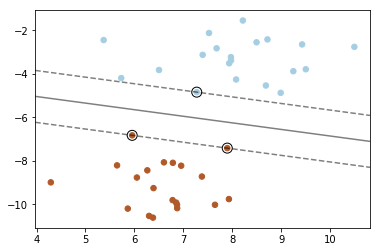

In [21]:
'''
An example of SVC
'''
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

C:\Users\zhihao.fang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zhihao.fang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


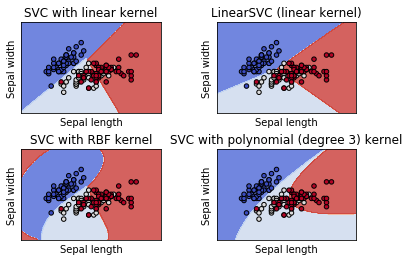

In [22]:
'''
Linear Support Vector Classification.

Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, 
so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.

This class supports both dense and sparse input and the multiclass support is handled according to a one-vs-the-rest scheme.

https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC
'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

### <font color='#0091D0'>3.2	Regression</font>

#### <font color='#0091D0'>3.2.1	Introduction</font>

Those who are in Machine Learning or Data Science are quite familiar with the term SVM or Support Vector Machine. But SVR is a bit different from SVM. As the name suggest the SVR is a regression algorithm, so we can use SVR for working with continuous Values instead of Classification which is SVM.  

In simple regression we try to minimize the error rate. While in SVR we try to fit the error within a certain threshold.

<img src="https://i.postimg.cc/W4SQ500s/23.png" width = "300">

Our objective when we are moving on with SVR is to basically consider the points that are within the boundary line. Our best fit line is the line hyperplane that has maximum number of points.

So the first thing we have to understand is what is this boundary line ?(yes! that red line). Think of it as to lines which are at a distance of $'e'$ (though not $e$ its basically epsilon) but for simplicity lets say its $'e'$.  
So the lines that we draw are at $'+e'$ and $'-e '$ distance from Hyper Plane.

Assuming our hyper plane is a straight line going through the $Y$ axis.We can say that the Equation of the hyper plane is

$$
w x+b=0
$$

So we can state that the two the equation of the boundary lines are  

\begin{equation}
\begin{array}{l}{W x+b=+e} \\ {W x+b=-e}\end{array}
\end{equation}

<img src="https://i.postimg.cc/G3Bmsp14/24.jpg" width = "300">

The error function is:  

$$
\operatorname{err}\left(x_{i}, y_{i}\right)=\left\{\begin{array}{c}{0,|y i-w \cdot \phi(x i)-b| \leq \epsilon} \\ {|y i-w \cdot \phi(x i)-b|-\epsilon,|y i-w \cdot \phi(x i)-b|>\epsilon}\end{array}\right\}
$$

The cost function pending to be optimized is:  

\begin{equation}
\min \frac{1}{2}\left\|w^{2}\right\| s . t .|y i-w \cdot \phi(x i)-b| \leq \epsilon(i=1,2,3, \dots, n)
\end{equation}

#### <font color='#0091D0'>3.2.2	SVR vs Linear Regression</font>

SVR can solve non-linear problem using kernel function.



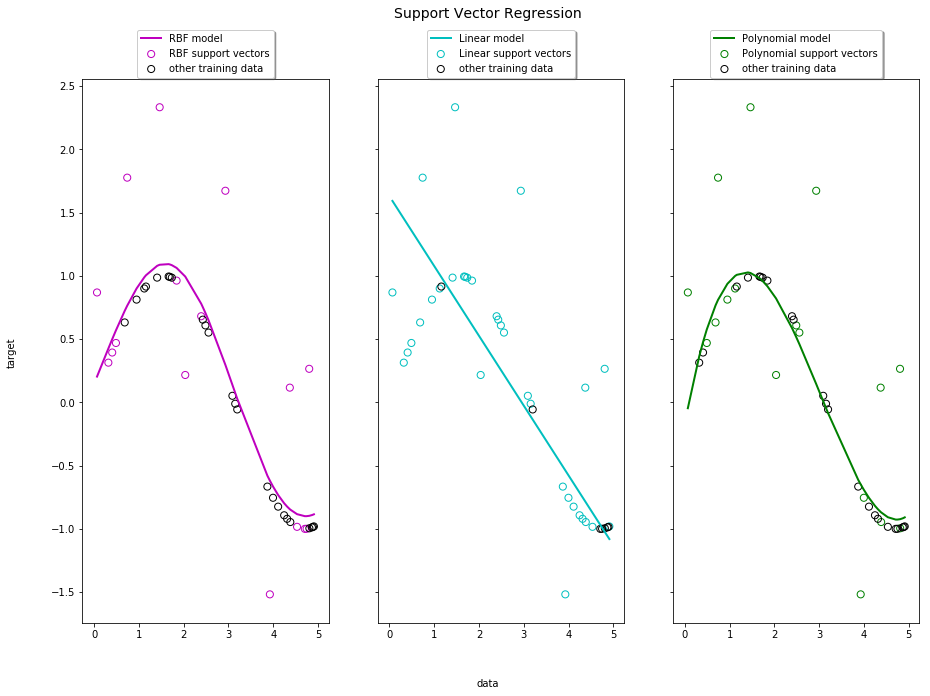

In [23]:
'''
The method of Support Vector Classification can be extended to solve regression problems. 
This method is called Support Vector Regression.

There are three different implementations of Support Vector Regression: SVR, NuSVR and LinearSVR. 
LinearSVR provides a faster implementation than SVR but only considers linear kernels, 
while NuSVR implements a slightly different formulation than SVR and LinearSVR. 

SVR can solve non-linear regression using kernel
'''

# https://scikit-learn.org/stable/modules/svm.html#svm-classification


import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# #############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

# #############################################################################
# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

## <font color='#0091D0'>4	Tree</font>

### <font color='#0091D0'>4.1	Decision Tree</font>

#### <font color='#0091D0'>4.1.1	General</font>

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. 

For more details, go to __[here](https://en.wikipedia.org/wiki/Decision_tree_learning)__.

<img src="https://i.postimg.cc/RhJyC8y0/24.png" width = "300">

#### <font color='#0091D0'>4.1.2	Advantages and Disadvantages</font>

##### <font color='#0091D0'>4.1.2.1	Advantages</font>

Simple to understand and to interpret. Trees can be visualised. 

Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.  

The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.  

Able to handle both numerical and categorical data. Other techniques are usually specialised in analysing datasets that have only one type of variable. See algorithms for more information.  

Able to handle multi-output problems.  

Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.  

Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.  

Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

##### <font color='#0091D0'>4.1.2.2	Disadvantages</font>

The disadvantages of decision trees include:  

Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting. Mechanisms such as pruning (not currently supported), setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.  

Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.  

The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.  

There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems.  

Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.

#### <font color='#0091D0'>4.1.3	Metrics</font>

Algorithms for constructing decision trees usually work top-down, by choosing a variable at each step that best splits the set of items. Different algorithms use different metrics for measuring "best". These generally measure the homogeneity of the target variable within the subsets. Some examples are given below. These metrics are applied to each candidate subset, and the resulting values are combined (e.g., averaged) to provide a measure of the quality of the split.

##### <font color='#0091D0'>4.1.3.1	Gini Impurity</font>

Used by the CART (classification and regression tree) algorithm for classification trees, Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. The Gini impurity can be computed by summing the probability $p_{i}$ of an item with label $i$ being chosen times the probability $\sum_{k \neq i} p_{k}=1-p_{i}$ of a mistake in categorizing that item. It reaches its minimum (zero) when all cases in the node fall into a single target category.  

To compute Gini impurity for a set of items with $J$ classes, suppose $i \in 1,2, \dots, J$ and let $p_{i}$ be the fraction of items labeled with class $i$ in the set.

$$
\mathrm{I}_{G}(p)=\sum_{i=1}^{J} p_{i} \sum_{k \neq i} p_{k}=\sum_{i=1}^{J} p_{i}\left(1-p_{i}\right)=\sum_{i=1}^{J}\left(p_{i}-p_{i}^{2}\right)=\sum_{i=1}^{J} p_{i}-\sum_{i=1}^{J} p_{i}^{2}=1-\sum_{i=1}^{J} p_{i}^{2}
$$

##### <font color='#0091D0'>4.1.3.2	Gini gain</font>

Gini gain is the evaluation criterion for selecting the attributes $A$ which is deﬁned as:

\begin{equation}
\operatorname{GiniGain}(A, S)=\operatorname{Gini}(S)-\operatorname{Gini}(A, S)=\operatorname{Gini}(S)-\sum_{i=1}^{n} \frac{\left|S_{i}\right|}{|S|} \operatorname{Gini}\left(S_{i}\right)
\end{equation}

##### <font color='#0091D0'>4.1.3.3	Example</font>

A small training set is shown in Table 1. There are 3 attributes which are $a_{1}$, $a_{2}$, and $a_{3}$. $a_{3}$ is a continuous attribute. The target set t has 2 classes which are $P, N$ (i.e. Positive & Negative).

<img src="https://i.postimg.cc/QVLPFmZJ/25.png" width = "300">

Solution:

The gini index of $a_{1}$, $a_{2}$ is:
$$
\begin{array}{l}{\text { Gini }(t)=1-(4 / 9)^{2}-(4 / 9)^{2}=40 / 81} \\ {\text { Gini }\left(a_{1}=T\right)=1-(3 / 4)^{2-}(1 / 4)^{2}=3 / 8} \\ {\text { Gini }\left(a_{1}=F\right)=1-(1 / 5)^{2}-(4 / 5)^{2}=8 / 25}\end{array}
$$

\begin{equation}
\begin{array}{l}{\operatorname{Gini}\left(a_{2}=T\right)=1-(2 / 5)^{2-}(3 / 5)^{2}=12 / 25} \\ {\text { Gini }\left(a_{2}=F\right)=1-(2 / 4)^{2}-(2 / 4)^{2}=1 / 2}\end{array}
\end{equation}

$$
\operatorname{Gini} \operatorname{Gain}\left(a_{1}\right)=\operatorname{Gini}(t)-\left[4 / 9^{*} \operatorname{Gini}\left(a_{1}=T\right)+5 / 9^{*} \operatorname{Gini}\left(a_{1}=F\right)\right]=0.149
$$

$$
\operatorname{Gini} \operatorname{Gain}\left(a_{1}\right)=\operatorname{Gini}(t)-\left[5 / 9^{*} \operatorname{Gini}\left(a_{2}=T\right)+5 / 9^{*} \operatorname{Gini}\left(a_{2}=F\right)\right]=0.005
$$

According to the gini gain, the best split between $a_{1}$ and $a_{2}$ is $a_{1}$ due to it has the higher gini gain.


#### <font color='#0091D0'>4.1.4	Information gain</font>

##### <font color='#0091D0'>4.1.4.1	Entropy</font>

Used by the ID3, C4.5 and C5.0 tree-generation algorithms. Information gain is based on the concept of entropy and information content from information theory.

Entropy is defined as below

\begin{equation}
\mathrm{H}(T)=\mathrm{I}_{E}\left(p_{1}, p_{2}, \ldots, p_{J}\right)=-\sum_{i=1}^{J} p_{i} \log _{2} p_{i}
\end{equation}

Information gain is used to decide which feature to split on at each step in building the tree. Simplicity is best, so we want to keep our tree small. To do so, at each step we should choose the split that results in the purest daughter nodes.

##### <font color='#0091D0'>4.1.4.2	Example</font>

<img src="https://i.postimg.cc/Fs3FDnzm/26.png" width = "300">

Here our target variable is Liability which can take on two values “Normal” and “High” and we only have one feature called Credit Rating which can take on values “Excellent”, “Good” and “Poor”. There are a total of 14 observations. 7 of them belong to the Normal Liability class and 7 belong to High Liability Class. So it’s an even split by itself. Summing across the top row we can see there are 4 observations that have value Excellent for the feature credit rating. 

$$
\begin{aligned} E(\text {Liability}) &=-\frac{7}{14} \log _{2}\left(\frac{7}{14}\right)-\frac{7}{14} \log _{2}\left(\frac{7}{14}\right) \\ &=-\frac{1}{2} \log _{2}\left(\frac{1}{2}\right)-\frac{1}{2} \log _{2}\left(\frac{1}{2}\right) \\ &=1 \end{aligned}
$$

\begin{equation}
E(\text {Liability } 1 C R=\text {Excellent})=-\frac{3}{4} \log _{2}\left(\frac{3}{4}\right)-\frac{1}{4} \log _{2}\left(\frac{1}{4}\right) \approx 0.811
\end{equation}

$$
\begin{array}{l}{E(\text { Liability } 1 \mathrm{CR}=\text { Good })=-\frac{4}{6} \log _{2}\left(\frac{4}{6}\right)-\frac{2}{6} \log _{2}\left(\frac{2}{6}\right) \approx 0.918} \\ {\text { E(Liability } \mathrm{CR}=\text { Poor) }=-\text { olog }_{2}(0)-\frac{4}{4} \log _{2}\left(\frac{4}{4}\right)=0}\end{array}
$$

\begin{equation}
\begin{aligned} \text {Weighted Average:} & \\ E(\text {Liability } 1 \mathrm{CR}) &=\frac{4}{14} \times 0.811+\frac{6}{14} \times 0.918+\frac{4}{14} \times 0 \\ &=0.625 \end{aligned}
\end{equation}

We got the entropy for our target variable given the feature Credit Rating. Now we can compute the Information Gain on Liability from Credit Rating to see how informative this feature is.  

Information Gain:
$$
\begin{aligned} I G(\text {Liability, } C R) &=E(\text {Liability})-E(\text {Liability} | C R) \\ &=1-0.625 \\ &=0.375 \end{aligned}
$$

Gini gain and information gain can be used to calculate the feature importance.

In [24]:
'''
Decision Tree Classification
'''
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=iris.feature_names,  class_names=iris.target_names,  filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("iris")

'iris.pdf'

### <font color='#0091D0'>4.2	Ensemble method</font>

The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.  

Two families of ensemble methods are usually distinguished:  
+ In averaging methods, the driving principle is to build several estimators independently and then to average their predictions. On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced.  

Examples: Bagging methods, Forests of randomized trees, …  

+ By contrast, in boosting methods, base estimators are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble.  

Examples: AdaBoost, Gradient Tree Boosting, …

#### <font color='#0091D0'>4.2.1	Random Forest</font>

##### <font color='#0091D0'>4.2.1.1	Bootstrapping and Aggregation</font>

Given a standard training set $D$ of size $n$, bagging generates m new training sets $D_{i}$ each of size $n'$, by sampling from $D$ uniformly and with replacement. By sampling with replacement, some observations may be repeated in each $D_{i}$. If $n′= n$, then for large n the set $D_{i}$ is expected to have the fraction $(1 - 1/e)$ (≈63.2%) of the unique examples of $D$, the rest being duplicates. This kind of sample is known as a bootstrap sample. Then, m models are fitted using the above m bootstrap samples and combined by averaging the output (for regression) or voting (for classification).

##### <font color='#0091D0'>4.2.1.2	Random Forest</font>
<img src="https://i.postimg.cc/nLPtHvr0/27.png" width = "400">

##### <font color='#0091D0'>4.2.1.3	Out-of-bag estimate</font>

###### <font color='#0091D0'>4.2.1.3.1	Example</font>
<img src="https://i.postimg.cc/15GPpn73/28.png" width = "400">

In bagging, every time we learn $g_{t}$, only some examples will be selected, so examples that are not selected when learning gt are called out-of-bag examples of $g_{t}$.

###### <font color='#0091D0'>4.2.1.3.2	Number of OOB</font>

<img src="https://i.postimg.cc/rwTVbCR4/29.png" width = "400">

###### <font color='#0091D0'>4.2.1.3.3	Feature Importance by permutation test</font>

<img src="https://i.postimg.cc/d01YPWsh/30.png" width = "400">

RF uses random test to make choices. If a certain feature is very important, then if some random noise is added to this feature, then the learning performance will definitely get worse. The specific way is to use permutation to shuffle all the data. This is called permutation test.

###### <font color='#0091D0'>4.2.1.3.4	How many trees</font>

The more, the better.

In [25]:
'''
Random forest example
'''
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)

clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(X, y)

print(clf.feature_importances_)

[0.14205973 0.76664038 0.0282433  0.06305659]



Cross Validation using out-of-bag data (OOB)



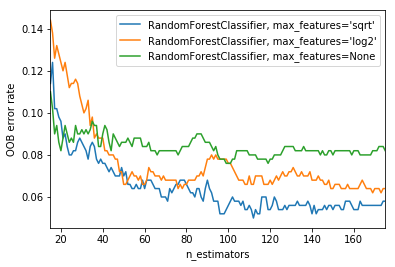

In [26]:
'''
Cross Validation using out-of-bag data (OOB)
'''

import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier


print(__doc__)

RANDOM_STATE = 123

# Generate a binary classification dataset.
X, y = make_classification(n_samples=500, n_features=25,
                           n_clusters_per_class=1, n_informative=15,
                           random_state=RANDOM_STATE)

# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 175

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

#### <font color='#0091D0'>4.2.2	Gradient Boosted Regression Trees</font>

##### <font color='#0091D0'>4.2.2.1	Overview</font>

Gradient Tree Boosting or Gradient Boosted Regression Trees (GBRT) is a generalization of boosting to arbitrary differentiable loss functions. GBRT is an accurate and effective off-the-shelf procedure that can be used for both regression and classification problems. Gradient Tree Boosting models are used in a variety of areas including Web search ranking and ecology.  

The advantages of GBRT are:  
+ Natural handling of data of mixed type (= heterogeneous features)  
+ Predictive power  
+ Robustness to outliers in output space (via robust loss functions)  

The disadvantages of GBRT are:  
+ Scalability, due to the sequential nature of boosting it can hardly be parallelized.  

##### <font color='#0091D0'>4.2.2.2	Mathematical Formula</font>

GBRT considers additive models of the following form:  

\begin{equation}
F(x)=\sum_{m=1}^{M} \gamma_{m} h_{m}(x)
\end{equation}

where $h(x)$ are the basis functions which are usually called weak learners in the context of boosting. Gradient Tree Boosting uses decision trees of fixed size as weak learners. Decision trees have a number of abilities that make them valuable for boosting, namely the ability to handle data of mixed type and the ability to model complex functions.

Similar to other boosting algorithms, GBRT builds the additive model in a greedy fashion:  

$$
F_{m}(x)=F_{m-1}(x)+\gamma_{m} h_{m}(x)
$$

where the newly added tree $h_{m}$ tries to minimize the loss $L$, given the previous ensemble $F_{m-1}$:

\begin{equation}
h_{m}=\arg \min _{h} \sum_{i=1}^{n} L\left(y_{i}, F_{m-1}\left(x_{i}\right)+h\left(x_{i}\right)\right)
\end{equation}

Gradient Boosting attempts to solve this minimization problem numerically via steepest descent: The steepest descent direction is the negative gradient of the loss function evaluated at the current model which can be calculated for any differentiable loss function:  

$$
F_{m}(x)=F_{m-1}(x)-\gamma_{m} \sum_{i=1}^{n} \nabla_{F} L\left(y_{i}, F_{m-1}\left(x_{i}\right)\right)
$$

Where the step length $\gamma_{m}$ is chosen using line search:

We may realize that this iteration function is very similar to :
$$
\theta_{j} :=\theta_{j}-\alpha \frac{\partial}{\partial \theta_{j}} J(\theta)
$$

In GBDT, the $F$ is just like $\theta$


\begin{equation}
\gamma_{m}=\arg \min _{\gamma} \sum_{i=1}^{n} L\left(y_{i}, F_{m-1}\left(x_{i}\right)-\gamma \frac{\partial L\left(y_{i}, F_{m-1}\left(x_{i}\right)\right)}{\partial F_{m-1}\left(x_{i}\right)}\right)
\end{equation}

In short, the rule of random forest is the combination of weak learner will be strong. For GB, starting from a weak learner, choose the best direction in each step, it finally will be a strong learner.


#### <font color='#0091D0'>4.2.3	Xgboost</font>

##### <font color='#0091D0'>4.2.3.1	Cost function </font>

Assuming we have $K$ trees

$$
\widehat{y}_{l}=\sum_{k=1}^{K} f_{k}\left(x_{i}\right), f_{k} \in \mathcal{F}
$$

Our objective is  

$$
\begin{array}{c}{\sum_{i=1}^{n} l\left(y_{i}, \hat{y}_{i}\right)+\sum_{k} \Omega\left(f_{k}\right), f_{k} \in \mathcal{F}} \\ {\text { Training loss Complexity of the trees }}\end{array}
$$

There are possible ways to define $\Omega$

+ Number of nodes in the tree, depth  
+ L2 norm of the leaf weights  
+ …  
  
##### <font color='#0091D0'>4.2.3.2	Heuristic vs Objective</font>

When we talk about decision trees, it is usually heuristic  
+ Split by information gain 
+ Prune the tree 
+ Maximum depth Smooth the leaf values 
+ Smooth the leaf values

Most heuristics maps well to objectives, taking the formal (objective) view let us know what we are learning  

+ Information gain -> training loss
+ Pruning -> regularization defined by #nodes
+ Max depth -> constraint on the function space
+ Smoothing leaf values -> $L2$ regularization on leaf weights

##### <font color='#0091D0'>4.2.3.3	How to understand regression tree</font>

Regression tree ensemble defines how you make the prediction score, it can be used for Classification, Regression, Ranking, …  

It all depends on how we define the objective function. So far we have learned:  

+ Using square loss $l\left(y_{i}, \hat{y}_{i}\right)=\left(y_{i}-\hat{y}_{i}\right)^{2}$: will result in common gradient boosted machine
+ Using logistic loss $l\left(y_{i,}, \hat{y}_{i}\right)=y_{i} \ln \left(1+e^{-y_{i}}\right)+\left(1-y_{i}\right) \ln \left(1+e^{y_{i}}\right)$: will results in LogitBoost

##### <font color='#0091D0'>4.2.3.4	Methodology</font>

###### <font color='#0091D0'>4.2.3.4.1	Boosting</font>

We use boosting

$$
\begin{aligned} \hat{y}_{i}^{(0)} &=0 \\ \hat{y}_{i}^{(1)} &=f_{1}\left(x_{i}\right)=\hat{y}_{i}^{(0)}+f_{1}\left(x_{i}\right) \\ \hat{y}_{i}^{(2)} &=f_{1}\left(x_{i}\right)+f_{2}\left(x_{i}\right)=\hat{y}_{i}^{(1)}+f_{2}\left(x_{i}\right) \\ \hat{y}_{i}^{(t)} &=\sum_{k=1}^{t} f_{k}\left(x_{i}\right)=\hat{y}_{i}^{(t-1)}+f_{t}\left(x_{i}\right) \longleftrightarrow \text { New function } \\ \text { Model at training round t } & \text { Keep functions added in previous round } \end{aligned}
$$

The question is how do we decide which $f$ to add?

The prediction at round t is ${\hat{y}}_i^t={\hat{y}}_i^{t-1}+f_t\left(x_i\right)$

$$
\begin{aligned} O b j^{(t)} &=\sum_{i=1}^{n} l\left(y_{i}, \hat{y}_{i}^{(t)}\right)+\sum_{i=1}^{t} \Omega\left(f_{i}\right) \\ &=\sum_{i=1}^{n} l\left(y_{i}, \hat{y}_{i}^{(t-1)}+f_{t}\left(x_{i}\right)\right)+\Omega\left(f_{t}\right)+\text {constant } \end{aligned}
$$

Consider square loss  

\begin{equation}
\begin{aligned} O b j^{(t)} &=\sum_{i=1}^{n}\left(y_{i}-\left(\hat{y}_{i}^{(t-1)}+f_{t}\left(x_{i}\right)\right)\right)^{2}+\Omega\left(f_{t}\right)+\text { const } \\ &=\sum_{i=1}^{n}\left[2\left(\hat{y}_{i}^{(t-1)}-y_{i}\right) f_{t}\left(x_{i}\right)+f_{t}\left(x_{i}\right)^{2}\right]+\Omega\left(f_{t}\right)+\text {const } \end{aligned}
\end{equation}


###### <font color='#0091D0'>4.2.3.4.2	Taylor Expansion Approximation of Loss</font>

Take Taylor expansion of the objective  

$$
\begin{array}{c}{\text { Recall } f(x+\Delta x) \simeq f(x)+f^{\prime}(x) \Delta x+\frac{1}{2} f^{\prime \prime}(x) \Delta x^{2}} \\ {\text { Define } g_{i}=\partial_{\hat{y}^{(t-1)}} l\left(y_{i}, \hat{y}^{(t-1)}\right), \quad h_{i}=\partial_{\hat{y}^{(t-1)}}^{2} l\left(y_{i}, \hat{y}^{(t-1)}\right)} \\ {O b j^{(t)} \simeq \sum_{i=1}^{n}\left[l\left(y_{i}, \hat{y}_{i}^{(t-1)}\right)+g_{i} f_{t}\left(x_{i}\right)+\frac{1}{2} h_{i} f_{t}^{2}\left(x_{i}\right)\right]+\Omega\left(f_{t}\right)+\text {constant }}\end{array}
$$

New goal after constant removed

\begin{equation}
\begin{array}{c}{\sum_{i=1}^{n}\left[g_{i} f_{t}\left(x_{i}\right)+\frac{1}{2} h_{i} f_{t}^{2}\left(x_{i}\right)\right]+\Omega\left(f_{t}\right)} \\ {\text { where } g_{i}=\partial_{\hat{y}^{(t-1)}} l\left(y_{i}, \hat{y}^{(t-1)}\right), \quad h_{i}=\partial_{\hat{y}^{(t-1)}}^{2} l\left(y_{i}, \hat{y}^{(t-1)}\right)}\end{array}
\end{equation}

In [27]:
'''
This is an example install and build model with xgboost

Command: "pip install xgboost" in anaconda terminal

https://xgboost.readthedocs.io/en/latest/index.html
'''
import xgboost as xgb
import numpy as np
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine

# Regression

diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

xgb_model.fit(X, y)

y_pred = xgb_model.predict(X)

mse=mean_squared_error(y, y_pred)

print(np.sqrt(mse))


# More exercise
# https://www.kaggle.com/stuarthallows/using-xgboost-with-scikit-learn

36.271203581682585


## <font color='#0091D0'>5	K-means</font>

### <font color='#0091D0'>5.1	Basic idea</font>

Say you are given a data set where each observed example has a set of features, but has no labels. Labels are an essential ingredient to a supervised algorithm like Support Vector Machines, which learns a hypothesis function to predict labels given features. So we can't run supervised learning. What can we do?  

One of the most straightforward tasks we can perform on a data set without labels is to find groups of data in our dataset which are similar to one another -- what we call clusters.  

K-Means is one of the most popular "clustering" algorithms. K-means stores $k$ centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid.  

K-Means finds the best centroids by alternating between (1) assigning data points to clusters based on the current centroids (2) chosing centroids (points which are the center of a cluster) based on the current assignment of data points to clusters.

<img src="https://i.postimg.cc/63FwhdNy/31.png" width = "500">

### <font color='#0091D0'>5.2	The algorithm</font>

In the clustering problem, we are given a training set $x^{\left(1\right)},...,x^{\left(m\right)}$, and want to group the data into a few cohesive "clusters." Here, we are given feature vectors for each data point $x^{\left(i\right)}\ \in\ R_n$ as usual; but no labels $y_{i}$ (making this an unsupervised learning problem). Our goal is to predict $k$ centroids and a label $C_{\left(i\right)}$ for each datapoint. The k-means clustering algorithm is as follows:

1. Initialize cluster centroids $\mu_1,\ \mu_2,\ \mu_{3,}\ldots,\ \mu_k\ \in\ \mathbb{R}^n$ randomly.
2. Repeat until convergence: {
    For every i, set    
    $$
C^{i}=\sum_{i=0}^{n} \min _{\mu_{j} \in C}\left(| | x_{i}-\mu_{j}\left\|^{2}\right)\right.
$$

    For every j, set 
    \begin{equation}
\mu_{j}=\frac{\sum_{i=1}^{m} 1 c^{(i)}=j x^{i}}{\sum_{i=1}^{m} 1\left\{c^{(i)}=j\right\}}
\end{equation}

}

### <font color='#0091D0'>5.3	Choosing of value of K (Elbow method)</font>

The “elbow” method to help data scientists select the optimal number of clusters by fitting the model with a range of values for K. If the line chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point.

<img src="https://i.postimg.cc/3wS3dsSj/32.png" width = "400">


Text(0.5, 1.0, 'Elbow curve')

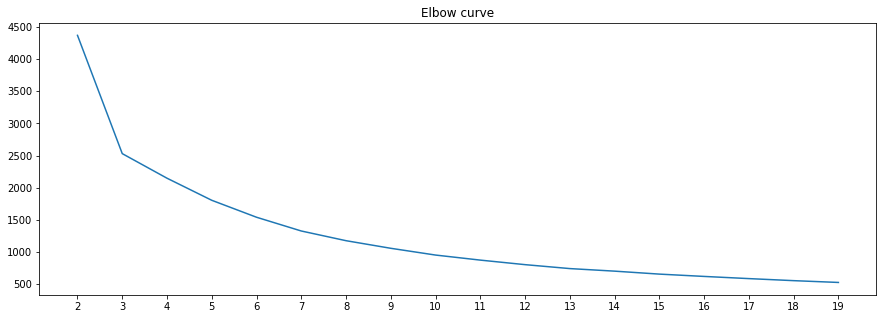

In [28]:
'''
Elbow method to find the optimial clusters for K-means 
'''

from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
import numpy as np

batch_size = 45
centers = [[1, 1], [-1, -1], [1, -1]]
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples=3000, centers=centers, cluster_std=0.7)

distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
my_x_ticks = np.arange(1, 20, 1)
plt.xticks(my_x_ticks)
plt.plot(range(2, 20), distorsions)
plt.title('Elbow curve')

## <font color = '#0091D0'>6	Neural Network</font>
    
### <font color = '#0091D0'>6.1	Models</font>
    
Consider a supervised learning problem where we have access to labeled training examples $(x(i),y(i))$. Neural networks give a way of defining a complex, non-linear form of hypotheses $h_{w,b}(x)$, with parameters $W,b$ that we can fit to our data.  

To describe neural networks, we will begin by describing the simplest possible neural network, one which comprises a single "neuron." We will use the following diagram to denote a single neuron:

<img src="https://i.postimg.cc/MpY68M1F/33.png" width = "300">

This "neuron" is a computational unit that takes as input $x_{1}, x_{2}, x_{3}$ (and $a + 1$ intercept term), and outputs $h_{w,b}\left(x\right)=f\left(W^Tx\right)=f\left(\sum_{i=1}^{3}W_ix_i+b\right)$, where $f$ is called the activation function. In these notes, we will choose $f\left(\bullet\right)$ to be the sigmoid function:

$$
f(z)=\frac{1}{1+\exp (-z)}
$$

Thus, our single neuron corresponds exactly to the input-output mapping defined by logistic regression.  

<mark>Although these notes will use the sigmoid function, it is worth noting that another common choice for $f$ is the hyperbolic tangent, or tanh, function:<mark>

\begin{equation}
f(z)=\tanh (z)=\frac{e^{z}-e^{-z}}{e^{z}+e^{-z}}
\end{equation}

Here are plots of the sigmoid and tanh functions:

<img src="http://ufldl.stanford.edu/wiki/images/c/ca/Sigmoid_Function.png" width = "400"> 
<img src="http://ufldl.stanford.edu/wiki/images/a/aa/Tanh_Function.png" width = "400"> 

The tanh(z) function is a rescaled version of the sigmoid, and its output range is [ − 1,1] instead of [0,1].
Finally, one identity that'll be useful later: If $f\left(z\right)=1/\left(1+exp\left(-z\right)\right)$ is the sigmoid function, then its derivative is given by $f^\prime\left(z\right)=f\left(z\right)\ast\left(1-f\left(z\right)\right)$. If f is the tanh function, then its derivative is given by $f^\prime\left(z\right)={1-\left(f\left(z\right)\right)}^2$. You can derive this yourself using the definition of the sigmoid (or tanh) function.
